In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [152]:
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [153]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### All the columns are non null

In [154]:
house_data.shape

(1460, 81)

#### Check how many columns have null values

In [155]:
null_data = house_data.isnull().sum().sort_values(ascending=False)
for key,value in null_data.items():
    if value > 0:
        print(key,value)

PoolQC 1453
MiscFeature 1406
Alley 1369
Fence 1179
MasVnrType 872
FireplaceQu 690
LotFrontage 259
GarageYrBlt 81
GarageCond 81
GarageType 81
GarageFinish 81
GarageQual 81
BsmtFinType2 38
BsmtExposure 38
BsmtQual 37
BsmtCond 37
BsmtFinType1 37
MasVnrArea 8
Electrical 1


#### We will start treatment of null values in columns one by one.

##### Let's do this step of missing value imputation on following columns:
1. Alley as NA in Alley is No Alley Access, 
2. Fence NA is no Fence, 
3. MasVnrType = None. 
4. FireplaceQu = NA is No Fireplace
5. MiscFeature = NA
6. PoolQC: Pool quality NA No Pool

In [156]:
house_data["Alley"] = house_data.Alley.fillna("NA")
house_data["Fence"] = house_data.Fence.fillna("NA")
house_data["MasVnrType"] = house_data.MasVnrType.fillna("None")
house_data["FireplaceQu"] = house_data.FireplaceQu.fillna("NA")
house_data["MiscFeature"] = house_data.MiscFeature.fillna("NA")
house_data["PoolQC"] = house_data.PoolQC.fillna("NA")

In [157]:
## Let's check remaining null values
null_data = house_data.isnull().sum().sort_values(ascending=False)
for key,value in null_data.items():
    if value > 0:
        print(key,value)

LotFrontage 259
GarageFinish 81
GarageType 81
GarageQual 81
GarageCond 81
GarageYrBlt 81
BsmtFinType2 38
BsmtExposure 38
BsmtQual 37
BsmtCond 37
BsmtFinType1 37
MasVnrArea 8
Electrical 1


##### Let's treat all the GarageColumns now
1. GarageType, GarageFinish, GarageCond, GarageQual, OverallQual, ExterQual the null values can be replaced with NA

In [158]:
house_data["GarageType"] = house_data.GarageType.fillna("NA")
house_data["GarageFinish"] = house_data.GarageFinish.fillna("NA")
house_data["GarageCond"] = house_data.GarageCond.fillna("NA")
house_data["GarageQual"] = house_data.GarageQual.fillna("NA")
house_data["OverallQual"] = house_data.OverallQual.fillna("NA")
house_data["ExterQual"] = house_data.ExterQual.fillna("NA")

#### If the year built is not available, garage is not there. So we can put in 0

In [159]:
house_data["GarageYrBlt"] = house_data.GarageYrBlt.fillna(0)

In [160]:
## Remaining null values
null_data = house_data.isnull().sum().sort_values(ascending=False)
for key,value in null_data.items():
    if value > 0:
        print(key,value)

LotFrontage 259
BsmtExposure 38
BsmtFinType2 38
BsmtQual 37
BsmtCond 37
BsmtFinType1 37
MasVnrArea 8
Electrical 1


##### Treating all the basement variables now

In [161]:
house_data["BsmtExposure"] = house_data.BsmtExposure.fillna("NA")
house_data["BsmtFinType2"] = house_data.BsmtFinType2.fillna("NA")
house_data["BsmtQual"] = house_data.BsmtQual.fillna("NA")
house_data["BsmtCond"] = house_data.BsmtCond.fillna("NA")
house_data["BsmtFinType1"] = house_data.BsmtFinType1.fillna("NA")

In [162]:
## Replacing LotFrontage null values with median
house_data["LotFrontage"] = house_data.LotFrontage.fillna(house_data.LotFrontage.median())
## We can replace null values in MasVnrArea with 0
house_data["MasVnrArea"] = house_data.MasVnrArea.fillna(0)
## There is only one null value for Electrical and no appropriate substitute available. Let'd drop that row
house_data = house_data[~house_data.Electrical.isnull()]

In [163]:
null_data = house_data.isnull().sum().sort_values(ascending=False)
for key,value in null_data.items():
    if value > 0:
        print(key,value)

In [164]:
house_data.shape

(1459, 81)

In [165]:
#Let's drop the Id col
house_data = house_data.drop("Id", axis=1)
house_data.shape

(1459, 80)

### As next step of cleaning we will work on ensuring that all the columns have values in range defined in data dictionary and fix any spelling, extra space.

In [166]:
house_data = house_data.replace(r"^ +| +$", r"", regex=True)

In [167]:
## Col: MSSubClass Expected Values: 20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190
house_data[~(house_data["MSSubClass"].isin([20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [168]:
## Col: MSZoning Expected Values: A, C FV, I, RH, RL RP, RM
res = house_data[~(house_data["MSZoning"].isin(["A", "C", "FV", "I", "RH", "RL", "RP", "RM"]))]
print(res["MSZoning"])

30      C (all)
88      C (all)
93      C (all)
495     C (all)
557     C (all)
711     C (all)
812     C (all)
916     C (all)
1061    C (all)
1279    C (all)
Name: MSZoning, dtype: object


In [169]:
house_data.loc[house_data["MSZoning"] == "C (all)", "MSZoning"] = "C"

In [170]:
res = house_data[~(house_data["MSZoning"].isin(["A", "C", "FV", "I", "RH", "RL", "RP", "RM"]))]
print(res)

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


In [171]:
house_data["LotFrontage"].describe()

count    1459.000000
mean       69.861549
std        22.035077
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [172]:
house_data["LotArea"].describe()

count      1459.000000
mean      10517.363948
std        9984.666267
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: LotArea, dtype: float64

#### We can see that there is outliers in LotArea. Let's remove the outlier value from both ends

In [173]:
q_low = house_data["LotArea"].quantile(0.05)
q_hi  = house_data["LotArea"].quantile(0.95)

house_data = house_data[(house_data["LotArea"] < q_hi) & (house_data["LotArea"] > q_low)]

In [174]:
house_data["LotArea"].describe()

count     1313.000000
mean      9607.321401
std       2794.798938
min       3316.000000
25%       7819.000000
50%       9477.000000
75%      11310.000000
max      17400.000000
Name: LotArea, dtype: float64

##### Data is much more evenly distributed now

In [175]:
house_data[~(house_data["Street"].isin(["Grvl", "Pave"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [176]:
house_data[~(house_data["Alley"].isin(["Grvl", "Pave", "NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [177]:
house_data[~(house_data["LotShape"].isin(["Reg", "IR1", "IR2", "IR3"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [178]:
house_data[~(house_data["LandContour"].isin(["Lvl", "Bnk", "HLS", "Low"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [179]:
house_data[~(house_data["Utilities"].isin(["AllPub", "NoSewr", "NoSeWa", "ELO"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [180]:
house_data[~(house_data["LotConfig"].isin(["Inside", "Corner", "CulDSac", "FR2", "FR3"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [181]:
res = house_data[~(house_data["Neighborhood"].isin(["Blmngtn","Blueste","BrDale","BrkSide","ClearCr","CollgCr","Crawfor","Edwards",
"Gilbert","IDOTRR","MeadowV","Mitchel","Names","NoRidge","NPkVill","NridgHt","NWAmes","OldTown","SWISU","Sawyer","SawyerW","Somerst",
"StoneBr","Timber","Veenker"]))]
print(res["Neighborhood"])

14      NAmes
16      NAmes
19      NAmes
26      NAmes
28      NAmes
        ...  
1427    NAmes
1435    NAmes
1436    NAmes
1450    NAmes
1458    NAmes
Name: Neighborhood, Length: 217, dtype: object


In [182]:
def fixCapitalization(x):
    if x == "NAmes":
        return "Names"
    return x
house_data["Neighborhood"] = house_data.Neighborhood.apply(fixCapitalization)

In [183]:
res = house_data[~(house_data["Neighborhood"].isin(["Blmngtn","Blueste","BrDale","BrkSide","ClearCr","CollgCr","Crawfor","Edwards",
"Gilbert","IDOTRR","MeadowV","Mitchel","Names","NoRidge","NPkVill","NridgHt","NWAmes","OldTown","SWISU","Sawyer","SawyerW","Somerst",
"StoneBr","Timber","Veenker"]))]
print(res["Neighborhood"])

Series([], Name: Neighborhood, dtype: object)


In [184]:
house_data[~(house_data["Condition1"].isin(["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [185]:
house_data[~(house_data["Condition2"].isin(["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [186]:
res = house_data[~(house_data["BldgType"].isin(["1Fam","2FmCon","Duplx","TwnhsE","TwnhsI"]))]
print(res["BldgType"])
print((house_data["BldgType"] == "TwnhsE").sum())
print((house_data["BldgType"] == "TwnhsI").sum())
print((house_data["BldgType"] == "Twnhs").sum())

9       2fmCon
17      Duplex
39      Duplex
48      2fmCon
52      Duplex
         ...  
1391    Duplex
1393    2fmCon
1412    Duplex
1416    2fmCon
1450    Duplex
Name: BldgType, Length: 83, dtype: object
82
0
5


In [187]:
## We see that TwnhsI does not exist from data dictionary, but Twnhs does, we will substitute it with TwnhsI
def standarizeName(x):
    if x == "2fmCon":
        return "2FmCon"
    elif x == "Duplex":
        return "Duplx"
    elif x == "Twnhs":
        return "TwnhsI"
    return x
house_data["BldgType"] = house_data.BldgType.apply(standarizeName)

In [188]:
res = house_data[~(house_data["BldgType"].isin(["1Fam","2FmCon","Duplx","TwnhsE","TwnhsI"]))]
print(res["BldgType"])

Series([], Name: BldgType, dtype: object)


In [189]:
house_data[~(house_data["HouseStyle"].isin(["1Story","1.5Fin","1.5Unf","2Story","2.5Fin","2.5Unf","SFoyer","SLvl"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [190]:
house_data[~(house_data["OverallCond"].isin([1,2,3,4,5,6,7,8,9,10]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [191]:
house_data[~(house_data["RoofStyle"].isin(["Flat","Gable","Gambrel","Hip","Mansard","Shed"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [192]:
house_data[~(house_data["RoofMatl"].isin(["ClyTile","CompShg","Membran","Metal","Roll","Tar&Grv", "WdShake", "WdShngl"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [193]:
house_data[~(house_data["Exterior1st"].isin(["AsbShng","AsphShn","BrkComm","BrkFace","CBlock","CemntBd","HdBoard","ImStucc","MetalSd","Other",
"Plywood","PreCast","Stone","Stucco","VinylSd","Wd Sdng","WdShing"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [194]:
res = house_data[~(house_data["Exterior2nd"].isin(["AsbShng","AsphShn","BrkComm","BrkFace","CBlock","CemntBd","HdBoard","ImStucc","MetalSd","Other",
"Plywood","PreCast","Stone","Stucco","VinylSd","Wd Sdng","WdShing"]))]
res["Exterior2nd"].value_counts()

Exterior2nd
CmentBd    41
Wd Shng    32
Brk Cmn     2
Name: count, dtype: int64

In [195]:
def fixSpace(x):
    if x == "Wd Shng":
        return "WdShing"
    elif x == "CmentBd":
        return "CemntBd"
    elif x == "Brk Cmn":
        return "BrkComm"
    return x
house_data["Exterior2nd"] = house_data["Exterior2nd"].apply(fixSpace)
res = house_data[~(house_data["Exterior2nd"].isin(["AsbShng","AsphShn","BrkComm","BrkFace","CBlock","CemntBd","HdBoard","ImStucc","MetalSd","Other",
"Plywood","PreCast","Stone","Stucco","VinylSd","Wd Sdng","WdShing"]))]
res["Exterior2nd"]

Series([], Name: Exterior2nd, dtype: object)

In [196]:
house_data[~(house_data["MasVnrType"].isin(["BrkCmn","BrkFace","CBlock","None","Stone"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [197]:
house_data[~(house_data["ExterCond"].isin(["Ex","Gd","TA","Fa","Po"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [198]:
house_data[~(house_data["Foundation"].isin(["BrkTil","CBlock","PConc","Slab","Stone","Wood"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [199]:
house_data[~(house_data["BsmtQual"].isin(["Ex","Gd","TA","Fa","Po","NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [200]:
house_data[~(house_data["BsmtCond"].isin(["Ex","Gd","TA","Fa","Po","NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [201]:
house_data[~(house_data["BsmtExposure"].isin(["Gd","Av","Mn","No","NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [202]:
house_data[~(house_data["BsmtFinType1"].isin(["GLQ","ALQ","BLQ","Rec","LwQ", "Unf", "NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [203]:
house_data[~(house_data["BsmtFinType2"].isin(["GLQ","ALQ","BLQ","Rec","LwQ", "Unf", "NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [204]:
house_data[~(house_data["Heating"].isin(["Floor","GasA","GasW","Grav","OthW", "Wall"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [205]:
house_data[~(house_data["HeatingQC"].isin(["Ex","Gd","TA","Fa","Po"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [206]:
house_data[~(house_data["CentralAir"].isin(["N","Y"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [207]:
house_data[~(house_data["Electrical"].isin(["SBrkr","FuseA","FuseF","FuseP","Mix"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [208]:
house_data[~(house_data["KitchenQual"].isin(["Ex","Gd","TA","Fa","Po"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [209]:
house_data[~(house_data["Functional"].isin(["Typ","Min1","Min2","Mod","Maj1","Maj2","Sev","Sal"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [210]:
house_data[~(house_data["FireplaceQu"].isin(["Ex","Gd","TA","Fa","Po","NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [211]:
house_data[~(house_data["GarageType"].isin(["2Types","Attchd","Basment","BuiltIn","CarPort","Detchd","NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [212]:
house_data[~(house_data["GarageFinish"].isin(["Fin","RFn","Unf","NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [213]:
house_data[~(house_data["GarageCond"].isin(["Ex","Gd","TA","Fa","Po","NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [214]:
house_data[~(house_data["PavedDrive"].isin(["Y","P","N"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [215]:
house_data[~(house_data["PoolQC"].isin(["Ex","Gd","TA","Fa","NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [216]:
house_data[~(house_data["Fence"].isin(["GdPrv","MnPrv","GdWo","MnWw","NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [217]:
house_data[~(house_data["MiscFeature"].isin(["Elev","Gar2","Othr","Shed","TenC","NA"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [218]:
house_data[~(house_data["SaleType"].isin(["WD","CWD","VWD","New","COD","Con","ConLw","ConLI","ConLD","Oth"]))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [219]:
house_data[~(house_data["SaleCondition"].isin(["Normal","Abnorml","AdjLand","Alloca","Family","Partial"]))]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### We have completed data cleaning for all the columns, ensured that values are homogenous and withing defined of data dictionary, added appropriate handling for null values.

In [220]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1313 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1313 non-null   int64  
 1   MSZoning       1313 non-null   object 
 2   LotFrontage    1313 non-null   float64
 3   LotArea        1313 non-null   int64  
 4   Street         1313 non-null   object 
 5   Alley          1313 non-null   object 
 6   LotShape       1313 non-null   object 
 7   LandContour    1313 non-null   object 
 8   Utilities      1313 non-null   object 
 9   LotConfig      1313 non-null   object 
 10  LandSlope      1313 non-null   object 
 11  Neighborhood   1313 non-null   object 
 12  Condition1     1313 non-null   object 
 13  Condition2     1313 non-null   object 
 14  BldgType       1313 non-null   object 
 15  HouseStyle     1313 non-null   object 
 16  OverallQual    1313 non-null   int64  
 17  OverallCond    1313 non-null   int64  
 18  YearBuilt    

In [221]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1313 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1313 non-null   int64  
 1   MSZoning       1313 non-null   object 
 2   LotFrontage    1313 non-null   float64
 3   LotArea        1313 non-null   int64  
 4   Street         1313 non-null   object 
 5   Alley          1313 non-null   object 
 6   LotShape       1313 non-null   object 
 7   LandContour    1313 non-null   object 
 8   Utilities      1313 non-null   object 
 9   LotConfig      1313 non-null   object 
 10  LandSlope      1313 non-null   object 
 11  Neighborhood   1313 non-null   object 
 12  Condition1     1313 non-null   object 
 13  Condition2     1313 non-null   object 
 14  BldgType       1313 non-null   object 
 15  HouseStyle     1313 non-null   object 
 16  OverallQual    1313 non-null   int64  
 17  OverallCond    1313 non-null   int64  
 18  YearBuilt    

## PRELEMINARY DATA ANALYSIS

In [222]:
# all numeric (float and int) variables in the dataset
house_numeric = house_data.select_dtypes(include=['float64', 'int64', 'int32'])
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [223]:
# correlation matrix
cor = house_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.242325,-0.247965,0.065637,-0.040576,-0.033228,0.036983,-0.014719,-0.036331,-0.077481,-0.124818,-0.201787,-0.161599,0.322505,0.061282,0.171419,0.050274,0.013696,0.162660,0.124897,0.048101,0.376769,0.146281,0.020703,-0.076867,-0.001003,-0.050466,-0.009897,0.045272,0.036038,-0.031876,0.008054,0.002751,-0.014028,0.009366,-0.030070,-0.015327
LotFrontage,-0.242325,1.000000,0.508743,0.273200,-0.091520,0.234820,0.116712,0.258470,0.132794,0.033757,0.135901,0.298264,0.325777,0.110728,-0.021175,0.330057,0.032728,-0.027775,0.224988,0.144145,0.227073,-0.022422,0.298408,0.199746,0.111286,0.308755,0.321656,0.101300,0.095224,-0.060207,0.068393,0.032438,0.086529,-0.006287,0.006396,0.027946,0.380519
LotArea,-0.247965,0.508743,1.000000,0.273218,-0.065588,0.195867,0.117167,0.226544,0.165074,0.061048,0.108410,0.312424,0.385864,0.164764,-0.030627,0.419847,0.048774,0.017597,0.261388,0.203683,0.290415,-0.051537,0.386242,0.301927,0.164154,0.311176,0.325992,0.182845,0.109922,-0.079722,0.043658,0.087791,0.064515,0.039347,-0.014829,-0.028712,0.429340
OverallQual,0.065637,0.273200,0.273218,1.000000,-0.111639,0.599490,0.553920,0.412849,0.221973,-0.055088,0.315199,0.552234,0.487916,0.285003,-0.067236,0.595363,0.111062,-0.052188,0.561195,0.284860,0.105704,-0.190686,0.426071,0.405610,0.289287,0.611813,0.579579,0.243760,0.319350,-0.132936,0.027839,0.062756,0.043923,-0.022458,0.078632,-0.011140,0.816963
OverallCond,-0.040576,-0.091520,-0.065588,-0.111639,1.000000,-0.370135,0.065985,-0.127597,-0.047199,0.051124,-0.152736,-0.195436,-0.180194,0.019606,0.007892,-0.112130,-0.067646,0.132255,-0.222478,-0.051129,-0.003198,-0.082082,-0.085793,-0.042897,0.008559,-0.192259,-0.153173,-0.016189,-0.039810,0.083978,0.007108,0.048736,-0.002710,0.086818,-0.015617,0.034094,-0.114960
YearBuilt,-0.033228,0.234820,0.195867,0.599490,-0.370135,1.000000,0.601932,0.320613,0.276614,-0.038632,0.161626,0.449374,0.342816,0.007389,-0.174902,0.237639,0.217174,-0.032941,0.495093,0.242278,-0.040384,-0.181337,0.128751,0.179264,0.286221,0.576014,0.531054,0.245416,0.211707,-0.397662,0.030235,-0.029052,0.018345,-0.039384,0.025678,-0.005144,0.588100
YearRemodAdd,0.036983,0.116712,0.117167,0.553920,0.065985,0.601932,1.000000,0.179653,0.136381,-0.056469,0.181864,0.318113,0.258358,0.133400,-0.084995,0.295344,0.137236,-0.004467,0.443695,0.191192,-0.031866,-0.152212,0.197755,0.118863,0.149536,0.435549,0.400946,0.228915,0.235408,-0.197618,0.037665,-0.035934,0.008697,-0.004499,0.030157,0.049841,0.540278
MasVnrArea,-0.014719,0.258470,0.226544,0.412849,-0.127597,0.320613,0.179653,1.000000,0.225157,-0.063543,0.144650,0.367982,0.366001,0.135748,-0.065936,0.376839,0.091448,0.010018,0.276811,0.177511,0.101977,-0.030941,0.293226,0.278643,0.136915,0.387598,0.393725,0.164847,0.131145,-0.112920,0.019826,0.084071,-0.009134,-0.026541,0.009858,0.007280,0.484185
BsmtFinSF1,-0.036331,0.132794,0.165074,0.221973,-0.047199,0.276614,0.136381,0.225157,1.000000,-0.046740,-0.531245,0.452824,0.385743,-0.179655,-0.069539,0.114620,0.652796,0.072064,0.060621,-0.010760,-0.126224,-0.093379,-0.008991,0.225702,0.120634,0.212685,0.242923,0.190353,0.060366,-0.128417,0.031698,0.078682,0.072565,0.002128,-0.004112,0.014697,0.386856
BsmtFinSF2,-0.077481,0.033757,0.061048,-0.055088,0.051124,-0.038632,-0.056469,-0.063543,-0.046740,1.000000,-0.202133,0.105007,0.086973,-0.111936,-0.002755,-0.035496,0.151108,0.067421,-0.091703,-0.041563,-0.020337,-0.043022,-0.049370,0.014281,0.060999,-0.037043,-0.015409,0.070565,-0.017215,0.019496,-0.030447,0.073700,0.061056,-0.006623,-0.025616,0.035097,-0.023038


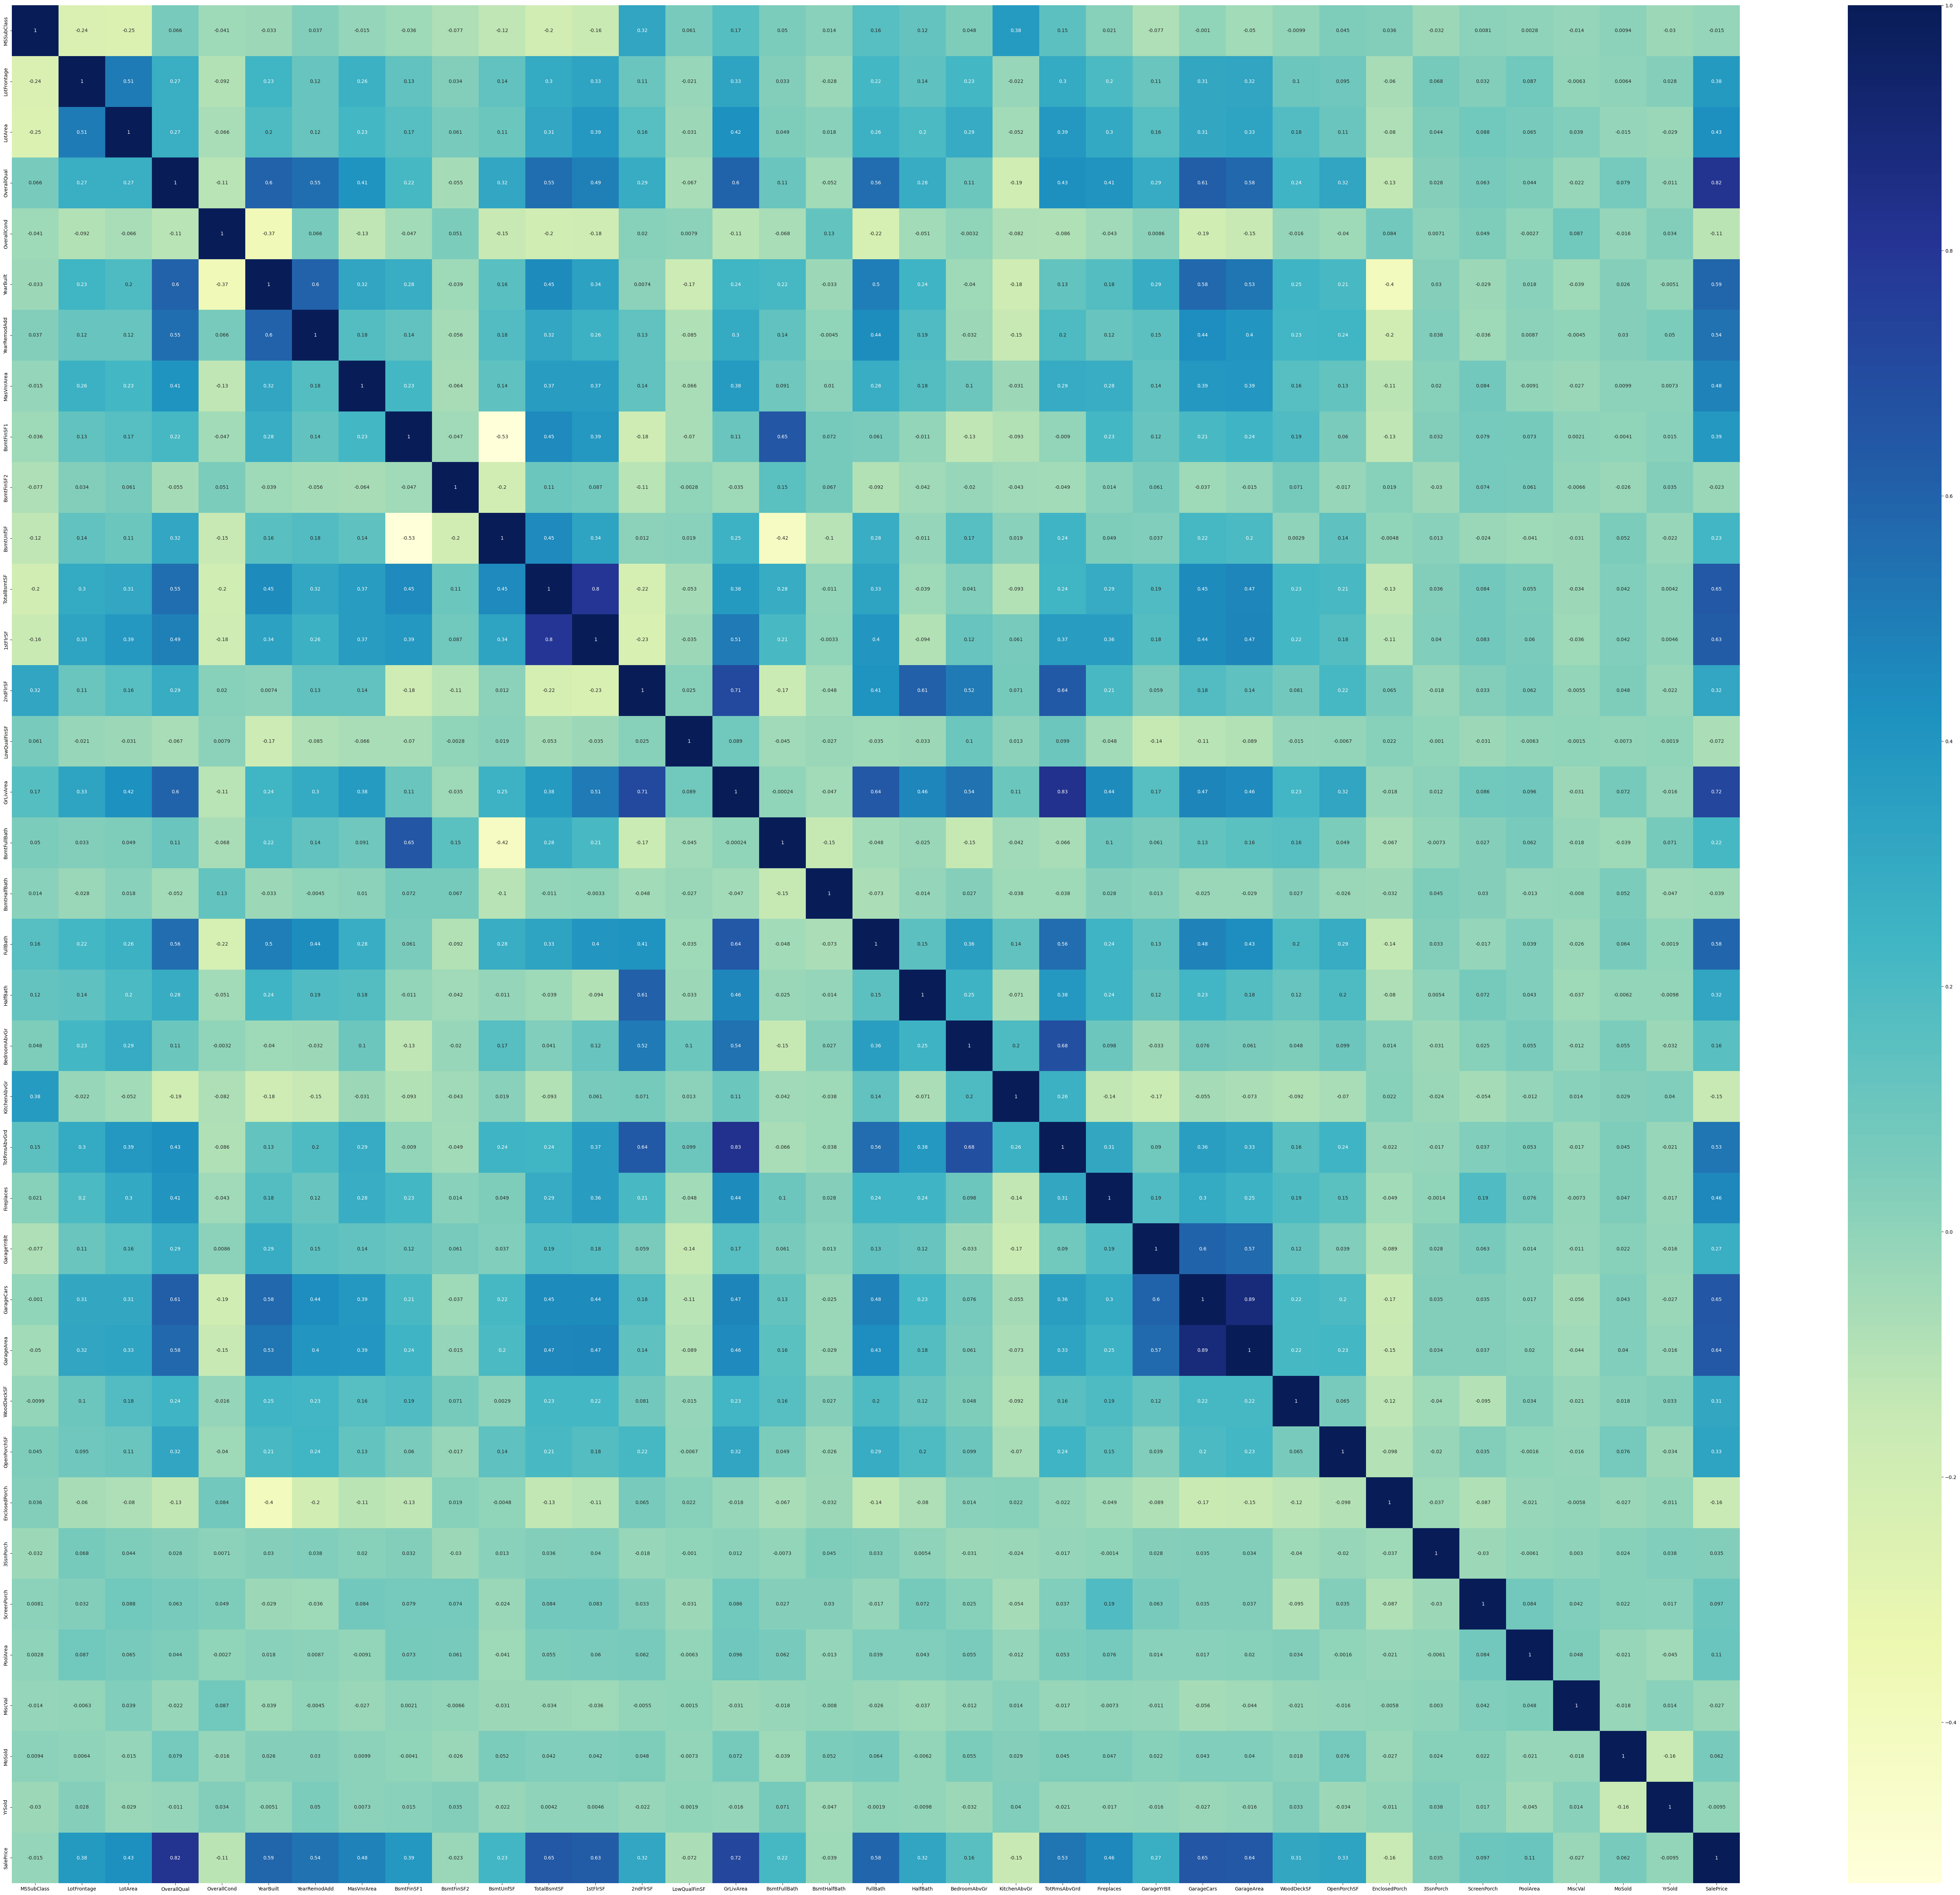

In [224]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(80,70))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

##### From the heatmap we can see that there is 
1. strong positive corelation between sale price and OverallQual, LotFrontage, LotArea,YearBuilt, 1stFloor Square Foot, Living Area, Full Bath, Garage Cars, Garage Area.                                                                                        2. There is Negative corelation of SalePrice with: OverallCond, BsmtFinSF2, LowQualFinSF, BSmtHalfBath, KitchensAbvGr,EnclosedPorch, MSSubClass
3. There is strong positive corelation between LotFrontage-LotArea, TotalRooms and GreaterLivingArea and TotalBathroom,GarageArea and GarageCars, BasementFullBath and BasementSquareFoot, YearRemodeled and YearBuilt.


## DATA TREATMENT
#### Handle Categorical Variables
##### As first step convert Number to String, targetting following columns
1. OverallCond: 10-VeryExcellent, 9-Excellent, 8-VeryGood, 7-Good, 6-AboveAverage, 5-Average, 4-BelowAverage, 3-Fair, 2-Poor, 1-VeryPoor
2. MSSubClass: 20->1STORY-1946-AND-NEW, 30->1STORY-1945-AND-OLDER, 40->ONESTORY-WFIN-ATTIC, 45->1.5STORY-UNFIN, 50->1.5STORY-FIN, 60->2-STORY-1946-AND-NEW, 70->2STORY-1945-AND-OLDER, 75->2.5STORY, 80->SPLIT-OR-MULTI, 85->SPLIT-FOYER, 90->DUPLX, 120->1STORY-PUD-1946-AND-NEW, 150->1.5STORY-ALLAGES, 160->2STORY-PUD-1946-AND-NEW, 180->PUD-MULTILEVEL, 190->2FAM-CONV

In [225]:
house_data.OverallCond = house_data.OverallCond.map({10:"VeryExcellent", 9:"Excellent", 8:"VeryGood", 7:"Good", 6:"AboveAverage", 5:"Average", 4:"BelowAverage", 3:"Fair", 2:"Poor", 1:"VeryPoor"})
house_data.MSSubClass = house_data.MSSubClass.map({20:"1STORY-1946-AND-NEW", 30:"1STORY-1945-AND-OLDER", 40:"ONESTORY-WFIN-ATTIC", 45:"1.5STORY-UNFIN",50:"1.5STORY-FIN", 60:"2-STORY-1946-AND-NEW", 70:"2STORY-1945-AND-OLDER", 75:"2.5STORY", 80:"SPLIT-OR-MULTI", 85:"SPLIT-FOYER", 90:"DUPLX", 120:"1STORY-PUD-1946-AND-NEW", 150:"1.5STORY-ALLAGES", 160:"2STORY-PUD-1946-AND-NEW", 180:"PUD-MULTILEVEL", 190:"2FAM-CONV"})
house_data[["OverallCond", "MSSubClass"]]

,OverallCond,MSSubClass
0,Average,2-STORY-1946-AND-NEW
1,VeryGood,1STORY-1946-AND-NEW
2,Average,2-STORY-1946-AND-NEW
3,Average,2STORY-1945-AND-OLDER
4,Average,2-STORY-1946-AND-NEW
...,...,...
1455,Average,2-STORY-1946-AND-NEW
1456,AboveAverage,1STORY-1946-AND-NEW
1457,Excellent,2STORY-1945-AND-OLDER
1458,AboveAverage,1STORY-1946-AND-NEW


In [226]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1313 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1313 non-null   object 
 1   MSZoning       1313 non-null   object 
 2   LotFrontage    1313 non-null   float64
 3   LotArea        1313 non-null   int64  
 4   Street         1313 non-null   object 
 5   Alley          1313 non-null   object 
 6   LotShape       1313 non-null   object 
 7   LandContour    1313 non-null   object 
 8   Utilities      1313 non-null   object 
 9   LotConfig      1313 non-null   object 
 10  LandSlope      1313 non-null   object 
 11  Neighborhood   1313 non-null   object 
 12  Condition1     1313 non-null   object 
 13  Condition2     1313 non-null   object 
 14  BldgType       1313 non-null   object 
 15  HouseStyle     1313 non-null   object 
 16  OverallQual    1313 non-null   int64  
 17  OverallCond    1313 non-null   object 
 18  YearBuilt    

In [227]:
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY-1946-AND-NEW,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,1STORY-1946-AND-NEW,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,VeryGood,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,2-STORY-1946-AND-NEW,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,2STORY-1945-AND-OLDER,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,Average,1915,1970,Gable,CompShg,Wd Sdng,WdShing,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,2-STORY-1946-AND-NEW,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


#### Let's now change categorical variables to dummy variables

In [228]:
pd.set_option('display.max_columns', None)
print("Housing cols before dummies")
print(house_data.shape)
cols = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
        "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2",
        "BldgType", "HouseStyle", "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st",
        "Exterior2nd", "MasVnrType", "ExterCond", "Foundation", "BsmtCond", "BsmtExposure",
        "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
        "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageCond", "GarageQual",
        "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition","BsmtQual", "ExterQual"]
status = pd.get_dummies(house_data[cols],drop_first = True, dtype = int)
house_data = pd.concat([house_data, status], axis = 1)
house_data = house_data.drop(cols, axis = 1)
print("Housing cols after dummies")
print(house_data.shape)

Housing cols before dummies
(1313, 80)
Housing cols after dummies
(1313, 272)


In [229]:
house_data.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1.5STORY-UNFIN,MSSubClass_1STORY-1945-AND-OLDER,MSSubClass_1STORY-1946-AND-NEW,MSSubClass_1STORY-PUD-1946-AND-NEW,MSSubClass_2-STORY-1946-AND-NEW,MSSubClass_2.5STORY,MSSubClass_2FAM-CONV,MSSubClass_2STORY-1945-AND-OLDER,MSSubClass_2STORY-PUD-1946-AND-NEW,MSSubClass_DUPLX,MSSubClass_ONESTORY-WFIN-ATTIC,MSSubClass_PUD-MULTILEVEL,MSSubClass_SPLIT-FOYER,MSSubClass_SPLIT-OR-MULTI,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Average,OverallCond_BelowAverage,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_VeryGood,OverallCond_VeryPoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa

#### Let's split the data in train and test now

In [230]:
df_train, df_test = train_test_split(house_data, train_size = 0.7, random_state = 100)
df_train.shape

(919, 272)

In [231]:
scaler = MinMaxScaler()
numeric_cols = house_data.select_dtypes(include=['float64', 'int64', 'int32']).columns
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1.5STORY-UNFIN,MSSubClass_1STORY-1945-AND-OLDER,MSSubClass_1STORY-1946-AND-NEW,MSSubClass_1STORY-PUD-1946-AND-NEW,MSSubClass_2-STORY-1946-AND-NEW,MSSubClass_2.5STORY,MSSubClass_2FAM-CONV,MSSubClass_2STORY-1945-AND-OLDER,MSSubClass_2STORY-PUD-1946-AND-NEW,MSSubClass_DUPLX,MSSubClass_ONESTORY-WFIN-ATTIC,MSSubClass_PUD-MULTILEVEL,MSSubClass_SPLIT-FOYER,MSSubClass_SPLIT-OR-MULTI,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Average,OverallCond_BelowAverage,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_VeryGood,OverallCond_VeryPoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa

In [232]:
#Our predictor variable is SalePrice
Y_train = df_train.pop("SalePrice")
X_train = df_train
print(X_train.shape)
print(Y_train.shape)

(919, 271)
(919,)


In [233]:
Y_train

455     0.198000
1050    0.199387
815     0.267568
1381    0.285312
1087    0.305732
          ...   
888     0.328264
54      0.133925
387     0.126884
83      0.128996
878     0.159273
Name: SalePrice, Length: 919, dtype: float64

## MODEL BUILDING AND EVALUATION

In [234]:
# We will use Linear Regression using scikit learn so we can utilize RFE(Recursive Feature Elimination) to drop unwanted feature
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [235]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
#Let's start with 30 columns out of 291
rfe = RFE(lm, n_features_to_select = 30)
rfe = rfe.fit(X_train, Y_train)

In [236]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 123),
 ('LotArea', False, 62),
 ('OverallQual', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 66),
 ('MasVnrArea', False, 64),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 11),
 ('GrLivArea', False, 10),
 ('BsmtFullBath', False, 209),
 ('BsmtHalfBath', False, 167),
 ('FullBath', False, 102),
 ('HalfBath', False, 101),
 ('BedroomAbvGr', False, 47),
 ('KitchenAbvGr', False, 57),
 ('TotRmsAbvGrd', False, 50),
 ('Fireplaces', False, 88),
 ('GarageYrBlt', False, 218),
 ('GarageCars', False, 144),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 149),
 ('OpenPorchSF', False, 192),
 ('EnclosedPorch', False, 178),
 ('3SsnPorch', False, 161),
 ('ScreenPorch', False, 76),
 ('PoolArea', True, 1),
 ('MiscVal', False, 134),
 ('MoSold', False, 180),
 ('YrSold', False, 230),
 ('MSSubClass_1.5STORY-UNFIN', False, 13),
 ('MSSubClass_

In [237]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GarageArea', 'PoolArea', 'MSSubClass_DUPLX',
       'Neighborhood_Crawfor', 'Exterior2nd_BrkComm', 'BsmtCond_NA',
       'BsmtFinType1_NA', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ',
       'BsmtFinType2_LwQ', 'BsmtFinType2_NA', 'BsmtFinType2_Rec',
       'BsmtFinType2_Unf', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Mod', 'GarageCond_Po', 'PoolQC_Gd',
       'PoolQC_NA', 'BsmtQual_NA', 'ExterQual_Fa', 'ExterQual_Gd',
       'ExterQual_TA'],
      dtype='object')

In [238]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
print(X_train.shape)
print(Y_train.shape)

(919, 271)
(919,)


In [239]:
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     305.6
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:37:06   Log-Likelihood:                 1825.8
No. Observations:                 919   AIC:                            -3596.
Df Residuals:                     891   BIC:                            -3461.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1650      0.018      9.029      0.000       0.129       0.201
OverallQual              0.1295      0.014      9.303      0.000       0.102       0.157
YearBuilt                0.0660      0.007      8.881      0.000       0.051       0.081
BsmtFinSF1               0.0722      0.007     11.014      0.000       0.059       0.085
TotalBsmtSF              0.1571      0.024      6.641      0.000       0.111       0.204
1stFlrSF                 0.1645      0.018      9.047      0.000       0.129       0.200
2ndFlrSF                 0.1696      0.007     24.511      0.000       0.156       0.183
GarageArea               0.0509      0.008      6.752      0.000       0.036       0.066
PoolArea                 0.2328      0.024      9.505      0.000       0.185       0.281
MSSubClass_DUPLX        -0.0374      0.006     -5.910      0.000      -0.050      -0.025
Neighborhood_Crawfor     0.0428      0.006      6.662      0.000       0.030       0.055
Exterior2nd_BrkComm     -0.0385      0.025     -1.536      0.125      -0.088       0.011
BsmtCond_NA              0.0328      0.013      2.479      0.013       0.007       0.059
BsmtFinType1_NA          0.0328      0.013      2.479      0.013       0.007       0.059
BsmtFinType2_BLQ        -0.0603      0.014     -4.224      0.000      -0.088      -0.032
BsmtFinType2_GLQ        -0.0500      0.017     -2.913      0.004      -0.084      -0.016
BsmtFinType2_LwQ        -0.0490      0.014     -3.581      0.000      -0.076      -0.022
BsmtFinType2_NA         -0.0972      0.037     -2.601      0.009      -0.171      -0.024
BsmtFinType2_Rec        -0.0455      0.013     -3.373      0.001      -0.072      -0.019
BsmtFinType2_Unf        -0.0456      0.012     -3.755      0.000      -0.069      -0.022
KitchenQual_Fa          -0.0517      0.010     -4.949      0.000      -0.072      -0.031
KitchenQual_Gd          -0.0516      0.006     -8.276      0.000      -0.064      -0.039
KitchenQual_TA          -0.0611      0.007     -8.933      0.000      -0.075      -0.048
Functional_Mod          -0.0462      0.011     -4.119      0.000      -0.068      -0.024
GarageCond_Po           -0.0323      0.020     -1.620      0.106      -0.072       0.007
PoolQC_Gd               -0.2893      0.049     -5.847      0.000      -0.386      -0.192
PoolQC_NA               -0.0875      0.014     -6.373      0.000      -0.114      -0.061
BsmtQual_NA              0.0328      0.013      2.479      0.013       0.007       0.059
ExterQual_Fa            -0.0609      0.015     -3.976      0.000      -0.091      -0.031
ExterQual_Gd            -0.0603      0.008     -7.246      0.000      -0.077      -0.044
ExterQual_TA            -0.0697      0.009     -7.672      0.000      -0.087      -0.052
=========================================================

In [90]:
#X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,PoolArea,inf
13,BsmtFinType1_NA,inf
12,BsmtCond_NA,inf
25,PoolQC_Gd,inf
27,BsmtQual_NA,inf
26,PoolQC_NA,inf
17,BsmtFinType2_NA,28.756
30,ExterQual_TA,15.707
19,BsmtFinType2_Unf,13.755
29,ExterQual_Gd,12.512


##### Exterior2nd_BrkComm columns has high P value, let's eliminate it first

In [240]:
X_train_rfe = X_train_rfe.drop("Exterior2nd_BrkComm", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     316.8
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:38:17   Log-Likelihood:                 1824.6
No. Observations:                 919   AIC:                            -3595.
Df Residuals:                     892   BIC:                            -3465.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1652      0.018      9.030      0.000       0.129       0.201
OverallQual              0.1302      0.014      9.350      0.000       0.103       0.157
YearBuilt                0.0658      0.007      8.848      0.000       0.051       0.080
BsmtFinSF1               0.0725      0.007     11.062      0.000       0.060       0.085
TotalBsmtSF              0.1556      0.024      6.576      0.000       0.109       0.202
1stFlrSF                 0.1655      0.018      9.101      0.000       0.130       0.201
2ndFlrSF                 0.1698      0.007     24.513      0.000       0.156       0.183
GarageArea               0.0504      0.008      6.685      0.000       0.036       0.065
PoolArea                 0.2327      0.025      9.495      0.000       0.185       0.281
MSSubClass_DUPLX        -0.0367      0.006     -5.808      0.000      -0.049      -0.024
Neighborhood_Crawfor     0.0428      0.006      6.645      0.000       0.030       0.055
BsmtCond_NA              0.0319      0.013      2.409      0.016       0.006       0.058
BsmtFinType1_NA          0.0319      0.013      2.409      0.016       0.006       0.058
BsmtFinType2_BLQ        -0.0605      0.014     -4.234      0.000      -0.089      -0.032
BsmtFinType2_GLQ        -0.0505      0.017     -2.938      0.003      -0.084      -0.017
BsmtFinType2_LwQ        -0.0493      0.014     -3.601      0.000      -0.076      -0.022
BsmtFinType2_NA         -0.0967      0.037     -2.585      0.010      -0.170      -0.023
BsmtFinType2_Rec        -0.0456      0.013     -3.380      0.001      -0.072      -0.019
BsmtFinType2_Unf        -0.0459      0.012     -3.776      0.000      -0.070      -0.022
KitchenQual_Fa          -0.0534      0.010     -5.129      0.000      -0.074      -0.033
KitchenQual_Gd          -0.0515      0.006     -8.258      0.000      -0.064      -0.039
KitchenQual_TA          -0.0611      0.007     -8.924      0.000      -0.075      -0.048
Functional_Mod          -0.0498      0.011     -4.530      0.000      -0.071      -0.028
GarageCond_Po           -0.0318      0.020     -1.592      0.112      -0.071       0.007
PoolQC_Gd               -0.2889      0.050     -5.836      0.000      -0.386      -0.192
PoolQC_NA               -0.0873      0.014     -6.352      0.000      -0.114      -0.060
BsmtQual_NA              0.0319      0.013      2.409      0.016       0.006       0.058
ExterQual_Fa            -0.0598      0.015     -3.902      0.000      -0.090      -0.030
ExterQual_Gd            -0.0603      0.008     -7.239      0.000      -0.077      -0.044
ExterQual_TA            -0.0697      0.009     -7.671      0.000      -0.088      -0.052
==============================================================================
Omnibus:                      360.394   Durbin-Watson:             

##### We see that R squared has remained const, which means that col was not important to the model. GarageCond_Po is now exhibiting high P value. Let's check VIF as well.

In [241]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,BsmtQual_NA,inf
10,BsmtCond_NA,inf
11,BsmtFinType1_NA,inf
24,PoolQC_NA,266.251
15,BsmtFinType2_NA,28.754
28,ExterQual_TA,15.707
17,BsmtFinType2_Unf,13.752
27,ExterQual_Gd,12.512
20,KitchenQual_TA,9.472
19,KitchenQual_Gd,7.604


#### We will drop column with high P value: GarageCond_Po  and recalculate

In [242]:
X_train_rfe = X_train_rfe.drop("GarageCond_Po", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     328.8
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:39:21   Log-Likelihood:                 1823.3
No. Observations:                 919   AIC:                            -3595.
Df Residuals:                     893   BIC:                            -3469.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1651      0.018      9.016      0.000       0.129       0.201
OverallQual              0.1310      0.014      9.406      0.000       0.104       0.158
YearBuilt                0.0669      0.007      9.018      0.000       0.052       0.081
BsmtFinSF1               0.0729      0.007     11.119      0.000       0.060       0.086
TotalBsmtSF              0.1538      0.024      6.505      0.000       0.107       0.200
1stFlrSF                 0.1662      0.018      9.129      0.000       0.130       0.202
2ndFlrSF                 0.1690      0.007     24.441      0.000       0.155       0.183
GarageArea               0.0503      0.008      6.668      0.000       0.035       0.065
PoolArea                 0.2333      0.025      9.511      0.000       0.185       0.281
MSSubClass_DUPLX        -0.0366      0.006     -5.793      0.000      -0.049      -0.024
Neighborhood_Crawfor     0.0432      0.006      6.710      0.000       0.031       0.056
BsmtCond_NA              0.0317      0.013      2.390      0.017       0.006       0.058
BsmtFinType1_NA          0.0317      0.013      2.390      0.017       0.006       0.058
BsmtFinType2_BLQ        -0.0607      0.014     -4.245      0.000      -0.089      -0.033
BsmtFinType2_GLQ        -0.0508      0.017     -2.958      0.003      -0.085      -0.017
BsmtFinType2_LwQ        -0.0497      0.014     -3.627      0.000      -0.077      -0.023
BsmtFinType2_NA         -0.0965      0.037     -2.578      0.010      -0.170      -0.023
BsmtFinType2_Rec        -0.0458      0.014     -3.391      0.001      -0.072      -0.019
BsmtFinType2_Unf        -0.0463      0.012     -3.803      0.000      -0.070      -0.022
KitchenQual_Fa          -0.0536      0.010     -5.146      0.000      -0.074      -0.033
KitchenQual_Gd          -0.0505      0.006     -8.135      0.000      -0.063      -0.038
KitchenQual_TA          -0.0600      0.007     -8.797      0.000      -0.073      -0.047
Functional_Mod          -0.0494      0.011     -4.493      0.000      -0.071      -0.028
PoolQC_Gd               -0.2904      0.050     -5.862      0.000      -0.388      -0.193
PoolQC_NA               -0.0881      0.014     -6.407      0.000      -0.115      -0.061
BsmtQual_NA              0.0317      0.013      2.390      0.017       0.006       0.058
ExterQual_Fa            -0.0593      0.015     -3.870      0.000      -0.089      -0.029
ExterQual_Gd            -0.0609      0.008     -7.312      0.000      -0.077      -0.045
ExterQual_TA            -0.0703      0.009     -7.744      0.000      -0.088      -0.053
==============================================================================
Omnibus:                      360.789   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4721.67

#### All the columns now have low P, let's check VIF

In [243]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,BsmtQual_NA,inf
10,BsmtCond_NA,inf
11,BsmtFinType1_NA,inf
23,PoolQC_NA,265.996
15,BsmtFinType2_NA,28.753
27,ExterQual_TA,15.675
17,BsmtFinType2_Unf,13.747
26,ExterQual_Gd,12.487
20,KitchenQual_TA,9.366
19,KitchenQual_Gd,7.533


##### Dropping BsmtQual_NA based on high VIF(multicollinearity)

In [244]:
X_train_rfe = X_train_rfe.drop("BsmtQual_NA", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     328.8
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:40:29   Log-Likelihood:                 1823.3
No. Observations:                 919   AIC:                            -3595.
Df Residuals:                     893   BIC:                            -3469.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1651      0.018      9.016      0.000       0.129       0.201
OverallQual              0.1310      0.014      9.406      0.000       0.104       0.158
YearBuilt                0.0669      0.007      9.018      0.000       0.052       0.081
BsmtFinSF1               0.0729      0.007     11.119      0.000       0.060       0.086
TotalBsmtSF              0.1538      0.024      6.505      0.000       0.107       0.200
1stFlrSF                 0.1662      0.018      9.129      0.000       0.130       0.202
2ndFlrSF                 0.1690      0.007     24.441      0.000       0.155       0.183
GarageArea               0.0503      0.008      6.668      0.000       0.035       0.065
PoolArea                 0.2333      0.025      9.511      0.000       0.185       0.281
MSSubClass_DUPLX        -0.0366      0.006     -5.793      0.000      -0.049      -0.024
Neighborhood_Crawfor     0.0432      0.006      6.710      0.000       0.031       0.056
BsmtCond_NA              0.0475      0.020      2.390      0.017       0.008       0.086
BsmtFinType1_NA          0.0475      0.020      2.390      0.017       0.008       0.086
BsmtFinType2_BLQ        -0.0607      0.014     -4.245      0.000      -0.089      -0.033
BsmtFinType2_GLQ        -0.0508      0.017     -2.958      0.003      -0.085      -0.017
BsmtFinType2_LwQ        -0.0497      0.014     -3.627      0.000      -0.077      -0.023
BsmtFinType2_NA         -0.0965      0.037     -2.578      0.010      -0.170      -0.023
BsmtFinType2_Rec        -0.0458      0.014     -3.391      0.001      -0.072      -0.019
BsmtFinType2_Unf        -0.0463      0.012     -3.803      0.000      -0.070      -0.022
KitchenQual_Fa          -0.0536      0.010     -5.146      0.000      -0.074      -0.033
KitchenQual_Gd          -0.0505      0.006     -8.135      0.000      -0.063      -0.038
KitchenQual_TA          -0.0600      0.007     -8.797      0.000      -0.073      -0.047
Functional_Mod          -0.0494      0.011     -4.493      0.000      -0.071      -0.028
PoolQC_Gd               -0.2904      0.050     -5.862      0.000      -0.388      -0.193
PoolQC_NA               -0.0881      0.014     -6.407      0.000      -0.115      -0.061
ExterQual_Fa            -0.0593      0.015     -3.870      0.000      -0.089      -0.029
ExterQual_Gd            -0.0609      0.008     -7.312      0.000      -0.077      -0.045
ExterQual_TA            -0.0703      0.009     -7.744      0.000      -0.088      -0.053
==============================================================================
Omnibus:                      360.789   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4721.674
Skew:                           1.415   Prob(JB):                         0.00
Kurtosis

##### We can see that R squared is holding constant, which means these columns were not important in prediction. Let's check VIF again

In [245]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,BsmtCond_NA,inf
11,BsmtFinType1_NA,inf
23,PoolQC_NA,265.996
15,BsmtFinType2_NA,28.753
26,ExterQual_TA,15.675
17,BsmtFinType2_Unf,13.747
25,ExterQual_Gd,12.487
20,KitchenQual_TA,9.366
19,KitchenQual_Gd,7.533
3,TotalBsmtSF,7.004


In [246]:
X_train_rfe = X_train_rfe.drop("BsmtCond_NA", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     328.8
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:41:12   Log-Likelihood:                 1823.3
No. Observations:                 919   AIC:                            -3595.
Df Residuals:                     893   BIC:                            -3469.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1651      0.018      9.016      0.000       0.129       0.201
OverallQual              0.1310      0.014      9.406      0.000       0.104       0.158
YearBuilt                0.0669      0.007      9.018      0.000       0.052       0.081
BsmtFinSF1               0.0729      0.007     11.119      0.000       0.060       0.086
TotalBsmtSF              0.1538      0.024      6.505      0.000       0.107       0.200
1stFlrSF                 0.1662      0.018      9.129      0.000       0.130       0.202
2ndFlrSF                 0.1690      0.007     24.441      0.000       0.155       0.183
GarageArea               0.0503      0.008      6.668      0.000       0.035       0.065
PoolArea                 0.2333      0.025      9.511      0.000       0.185       0.281
MSSubClass_DUPLX        -0.0366      0.006     -5.793      0.000      -0.049      -0.024
Neighborhood_Crawfor     0.0432      0.006      6.710      0.000       0.031       0.056
BsmtFinType1_NA          0.0950      0.040      2.390      0.017       0.017       0.173
BsmtFinType2_BLQ        -0.0607      0.014     -4.245      0.000      -0.089      -0.033
BsmtFinType2_GLQ        -0.0508      0.017     -2.958      0.003      -0.085      -0.017
BsmtFinType2_LwQ        -0.0497      0.014     -3.627      0.000      -0.077      -0.023
BsmtFinType2_NA         -0.0965      0.037     -2.578      0.010      -0.170      -0.023
BsmtFinType2_Rec        -0.0458      0.014     -3.391      0.001      -0.072      -0.019
BsmtFinType2_Unf        -0.0463      0.012     -3.803      0.000      -0.070      -0.022
KitchenQual_Fa          -0.0536      0.010     -5.146      0.000      -0.074      -0.033
KitchenQual_Gd          -0.0505      0.006     -8.135      0.000      -0.063      -0.038
KitchenQual_TA          -0.0600      0.007     -8.797      0.000      -0.073      -0.047
Functional_Mod          -0.0494      0.011     -4.493      0.000      -0.071      -0.028
PoolQC_Gd               -0.2904      0.050     -5.862      0.000      -0.388      -0.193
PoolQC_NA               -0.0881      0.014     -6.407      0.000      -0.115      -0.061
ExterQual_Fa            -0.0593      0.015     -3.870      0.000      -0.089      -0.029
ExterQual_Gd            -0.0609      0.008     -7.312      0.000      -0.077      -0.045
ExterQual_TA            -0.0703      0.009     -7.744      0.000      -0.088      -0.053
==============================================================================
Omnibus:                      360.789   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4721.674
Skew:                           1.415   Prob(JB):                         0.00
Kurtosis:                      13.738   Cond. No.                     9.43e+15
==================

In [247]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,PoolQC_NA,265.996
10,BsmtFinType1_NA,31.062
14,BsmtFinType2_NA,28.753
25,ExterQual_TA,15.675
16,BsmtFinType2_Unf,13.747
24,ExterQual_Gd,12.487
19,KitchenQual_TA,9.366
18,KitchenQual_Gd,7.533
3,TotalBsmtSF,7.004
15,BsmtFinType2_Rec,4.942


In [248]:
X_train_rfe = X_train_rfe.drop("PoolQC_NA", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     328.8
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:41:39   Log-Likelihood:                 1823.3
No. Observations:                 919   AIC:                            -3595.
Df Residuals:                     893   BIC:                            -3469.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0770      0.018      4.235      0.000       0.041       0.113
OverallQual              0.1310      0.014      9.406      0.000       0.104       0.158
YearBuilt                0.0669      0.007      9.018      0.000       0.052       0.081
BsmtFinSF1               0.0729      0.007     11.119      0.000       0.060       0.086
TotalBsmtSF              0.1538      0.024      6.505      0.000       0.107       0.200
1stFlrSF                 0.1662      0.018      9.129      0.000       0.130       0.202
2ndFlrSF                 0.1690      0.007     24.441      0.000       0.155       0.183
GarageArea               0.0503      0.008      6.668      0.000       0.035       0.065
PoolArea                 0.3247      0.037      8.866      0.000       0.253       0.397
MSSubClass_DUPLX        -0.0366      0.006     -5.793      0.000      -0.049      -0.024
Neighborhood_Crawfor     0.0432      0.006      6.710      0.000       0.031       0.056
BsmtFinType1_NA          0.0950      0.040      2.390      0.017       0.017       0.173
BsmtFinType2_BLQ        -0.0607      0.014     -4.245      0.000      -0.089      -0.033
BsmtFinType2_GLQ        -0.0508      0.017     -2.958      0.003      -0.085      -0.017
BsmtFinType2_LwQ        -0.0497      0.014     -3.627      0.000      -0.077      -0.023
BsmtFinType2_NA         -0.0965      0.037     -2.578      0.010      -0.170      -0.023
BsmtFinType2_Rec        -0.0458      0.014     -3.391      0.001      -0.072      -0.019
BsmtFinType2_Unf        -0.0463      0.012     -3.803      0.000      -0.070      -0.022
KitchenQual_Fa          -0.0536      0.010     -5.146      0.000      -0.074      -0.033
KitchenQual_Gd          -0.0505      0.006     -8.135      0.000      -0.063      -0.038
KitchenQual_TA          -0.0600      0.007     -8.797      0.000      -0.073      -0.047
Functional_Mod          -0.0494      0.011     -4.493      0.000      -0.071      -0.028
PoolQC_Gd               -0.2938      0.050     -5.887      0.000      -0.392      -0.196
ExterQual_Fa            -0.0593      0.015     -3.870      0.000      -0.089      -0.029
ExterQual_Gd            -0.0609      0.008     -7.312      0.000      -0.077      -0.045
ExterQual_TA            -0.0703      0.009     -7.744      0.000      -0.088      -0.053
==============================================================================
Omnibus:                      360.789   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4721.674
Skew:                           1.415   Prob(JB):                         0.00
Kurtosis:                      13.738   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors 

In [249]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,BsmtFinType2_Unf,53.886
3,TotalBsmtSF,52.014
0,OverallQual,45.061
24,ExterQual_TA,33.551
4,1stFlrSF,31.838
10,BsmtFinType1_NA,31.028
14,BsmtFinType2_NA,29.103
1,YearBuilt,24.041
19,KitchenQual_TA,17.678
23,ExterQual_Gd,16.882


#### All the cols now have low P but VIF still holds high. We will drop high VIF col one by one

In [250]:
X_train_rfe = X_train_rfe.drop("BsmtFinType2_Unf", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     336.8
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:42:06   Log-Likelihood:                 1815.9
No. Observations:                 919   AIC:                            -3582.
Df Residuals:                     894   BIC:                            -3461.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0291      0.013      2.203      0.028       0.003       0.055
OverallQual              0.1327      0.014      9.468      0.000       0.105       0.160
YearBuilt                0.0658      0.007      8.812      0.000       0.051       0.080
BsmtFinSF1               0.0721      0.007     10.922      0.000       0.059       0.085
TotalBsmtSF              0.1653      0.024      6.994      0.000       0.119       0.212
1stFlrSF                 0.1607      0.018      8.793      0.000       0.125       0.197
2ndFlrSF                 0.1693      0.007     24.304      0.000       0.156       0.183
GarageArea               0.0498      0.008      6.561      0.000       0.035       0.065
PoolArea                 0.3231      0.037      8.756      0.000       0.251       0.395
MSSubClass_DUPLX        -0.0373      0.006     -5.848      0.000      -0.050      -0.025
Neighborhood_Crawfor     0.0426      0.006      6.573      0.000       0.030       0.055
BsmtFinType1_NA          0.1045      0.040      2.615      0.009       0.026       0.183
BsmtFinType2_BLQ        -0.0149      0.008     -1.919      0.055      -0.030       0.000
BsmtFinType2_GLQ        -0.0047      0.012     -0.383      0.702      -0.029       0.019
BsmtFinType2_LwQ        -0.0037      0.006     -0.566      0.572      -0.016       0.009
BsmtFinType2_NA         -0.0566      0.036     -1.564      0.118      -0.128       0.014
BsmtFinType2_Rec        -0.0001      0.006     -0.019      0.985      -0.012       0.012
KitchenQual_Fa          -0.0508      0.010     -4.856      0.000      -0.071      -0.030
KitchenQual_Gd          -0.0499      0.006     -7.969      0.000      -0.062      -0.038
KitchenQual_TA          -0.0594      0.007     -8.648      0.000      -0.073      -0.046
Functional_Mod          -0.0502      0.011     -4.530      0.000      -0.072      -0.028
PoolQC_Gd               -0.2928      0.050     -5.825      0.000      -0.392      -0.194
ExterQual_Fa            -0.0608      0.015     -3.939      0.000      -0.091      -0.031
ExterQual_Gd            -0.0618      0.008     -7.378      0.000      -0.078      -0.045
ExterQual_TA            -0.0707      0.009     -7.724      0.000      -0.089      -0.053
==============================================================================
Omnibus:                      352.924   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4387.615
Skew:                           1.391   Prob(JB):                         0.00
Kurtosis:                      13.337   Cond. No.                         94.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TotalBsmtSF,51.792
0,OverallQual,39.159
4,1stFlrSF,31.834
10,BsmtFinType1_NA,30.882
14,BsmtFinType2_NA,26.893
23,ExterQual_TA,25.955
1,YearBuilt,23.508
18,KitchenQual_TA,16.974
22,ExterQual_Gd,14.538
17,KitchenQual_Gd,12.161


##### BsmtFinType2_Rec is exhibiting highest P values among other, let's drop it.

In [252]:
### P Values still low, we will drop another col via VIF
X_train_rfe = X_train_rfe.drop("BsmtFinType2_Rec", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     351.9
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:43:20   Log-Likelihood:                 1815.9
No. Observations:                 919   AIC:                            -3584.
Df Residuals:                     895   BIC:                            -3468.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0291      0.013      2.204      0.028       0.003       0.055
OverallQual              0.1327      0.014      9.480      0.000       0.105       0.160
YearBuilt                0.0658      0.007      8.820      0.000       0.051       0.080
BsmtFinSF1               0.0721      0.007     10.938      0.000       0.059       0.085
TotalBsmtSF              0.1653      0.024      7.002      0.000       0.119       0.212
1stFlrSF                 0.1607      0.018      8.798      0.000       0.125       0.197
2ndFlrSF                 0.1693      0.007     24.319      0.000       0.156       0.183
GarageArea               0.0498      0.008      6.571      0.000       0.035       0.065
PoolArea                 0.3231      0.037      8.761      0.000       0.251       0.395
MSSubClass_DUPLX        -0.0372      0.006     -5.853      0.000      -0.050      -0.025
Neighborhood_Crawfor     0.0426      0.006      6.582      0.000       0.030       0.055
BsmtFinType1_NA          0.1045      0.040      2.617      0.009       0.026       0.183
BsmtFinType2_BLQ        -0.0149      0.008     -1.921      0.055      -0.030       0.000
BsmtFinType2_GLQ        -0.0047      0.012     -0.383      0.702      -0.029       0.019
BsmtFinType2_LwQ        -0.0037      0.006     -0.566      0.571      -0.016       0.009
BsmtFinType2_NA         -0.0566      0.036     -1.565      0.118      -0.128       0.014
KitchenQual_Fa          -0.0508      0.010     -4.859      0.000      -0.071      -0.030
KitchenQual_Gd          -0.0499      0.006     -7.978      0.000      -0.062      -0.038
KitchenQual_TA          -0.0594      0.007     -8.655      0.000      -0.073      -0.046
Functional_Mod          -0.0502      0.011     -4.533      0.000      -0.072      -0.028
PoolQC_Gd               -0.2928      0.050     -5.829      0.000      -0.391      -0.194
ExterQual_Fa            -0.0608      0.015     -3.945      0.000      -0.091      -0.031
ExterQual_Gd            -0.0618      0.008     -7.382      0.000      -0.078      -0.045
ExterQual_TA            -0.0707      0.009     -7.731      0.000      -0.089      -0.053
==============================================================================
Omnibus:                      352.964   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4387.995
Skew:                           1.391   Prob(JB):                         0.00
Kurtosis:                      13.337   Cond. No.                         94.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TotalBsmtSF,51.731
0,OverallQual,39.079
4,1stFlrSF,31.826
10,BsmtFinType1_NA,30.877
14,BsmtFinType2_NA,26.885
22,ExterQual_TA,25.935
1,YearBuilt,23.490
17,KitchenQual_TA,16.966
21,ExterQual_Gd,14.537
16,KitchenQual_Gd,12.150


#### BsmtFinType2_GLQ is our next target with high P value

In [254]:
X_train_rfe = X_train_rfe.drop("BsmtFinType2_GLQ", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     368.2
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:44:27   Log-Likelihood:                 1815.8
No. Observations:                 919   AIC:                            -3586.
Df Residuals:                     896   BIC:                            -3475.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0291      0.013      2.205      0.028       0.003       0.055
OverallQual              0.1329      0.014      9.496      0.000       0.105       0.160
YearBuilt                0.0657      0.007      8.818      0.000       0.051       0.080
BsmtFinSF1               0.0722      0.007     10.990      0.000       0.059       0.085
TotalBsmtSF              0.1653      0.024      7.007      0.000       0.119       0.212
1stFlrSF                 0.1605      0.018      8.794      0.000       0.125       0.196
2ndFlrSF                 0.1694      0.007     24.346      0.000       0.156       0.183
GarageArea               0.0498      0.008      6.572      0.000       0.035       0.065
PoolArea                 0.3231      0.037      8.766      0.000       0.251       0.395
MSSubClass_DUPLX        -0.0373      0.006     -5.875      0.000      -0.050      -0.025
Neighborhood_Crawfor     0.0425      0.006      6.574      0.000       0.030       0.055
BsmtFinType1_NA          0.1046      0.040      2.621      0.009       0.026       0.183
BsmtFinType2_BLQ        -0.0149      0.008     -1.918      0.055      -0.030       0.000
BsmtFinType2_LwQ        -0.0036      0.006     -0.560      0.576      -0.016       0.009
BsmtFinType2_NA         -0.0566      0.036     -1.565      0.118      -0.128       0.014
KitchenQual_Fa          -0.0505      0.010     -4.846      0.000      -0.071      -0.030
KitchenQual_Gd          -0.0498      0.006     -7.972      0.000      -0.062      -0.038
KitchenQual_TA          -0.0593      0.007     -8.651      0.000      -0.073      -0.046
Functional_Mod          -0.0501      0.011     -4.531      0.000      -0.072      -0.028
PoolQC_Gd               -0.2929      0.050     -5.832      0.000      -0.391      -0.194
ExterQual_Fa            -0.0615      0.015     -4.013      0.000      -0.092      -0.031
ExterQual_Gd            -0.0620      0.008     -7.409      0.000      -0.078      -0.046
ExterQual_TA            -0.0708      0.009     -7.753      0.000      -0.089      -0.053
==============================================================================
Omnibus:                      353.679   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4396.580
Skew:                           1.395   Prob(JB):                         0.00
Kurtosis:                      13.346   Cond. No.                         94.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### BsmtFinType2_LwQ is next with high P

In [255]:
X_train_rfe = X_train_rfe.drop("BsmtFinType2_LwQ", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     386.0
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:45:06   Log-Likelihood:                 1815.7
No. Observations:                 919   AIC:                            -3587.
Df Residuals:                     897   BIC:                            -3481.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0294      0.013      2.226      0.026       0.003       0.055
OverallQual              0.1329      0.014      9.502      0.000       0.105       0.160
YearBuilt                0.0654      0.007      8.805      0.000       0.051       0.080
BsmtFinSF1               0.0721      0.007     10.980      0.000       0.059       0.085
TotalBsmtSF              0.1665      0.023      7.084      0.000       0.120       0.213
1stFlrSF                 0.1593      0.018      8.791      0.000       0.124       0.195
2ndFlrSF                 0.1694      0.007     24.368      0.000       0.156       0.183
GarageArea               0.0500      0.008      6.604      0.000       0.035       0.065
PoolArea                 0.3232      0.037      8.772      0.000       0.251       0.396
MSSubClass_DUPLX        -0.0371      0.006     -5.853      0.000      -0.050      -0.025
Neighborhood_Crawfor     0.0424      0.006      6.563      0.000       0.030       0.055
BsmtFinType1_NA          0.1054      0.040      2.645      0.008       0.027       0.184
BsmtFinType2_BLQ        -0.0147      0.008     -1.901      0.058      -0.030       0.000
BsmtFinType2_NA         -0.0571      0.036     -1.579      0.115      -0.128       0.014
KitchenQual_Fa          -0.0505      0.010     -4.847      0.000      -0.071      -0.030
KitchenQual_Gd          -0.0498      0.006     -7.990      0.000      -0.062      -0.038
KitchenQual_TA          -0.0594      0.007     -8.677      0.000      -0.073      -0.046
Functional_Mod          -0.0499      0.011     -4.518      0.000      -0.072      -0.028
PoolQC_Gd               -0.2927      0.050     -5.831      0.000      -0.391      -0.194
ExterQual_Fa            -0.0616      0.015     -4.025      0.000      -0.092      -0.032
ExterQual_Gd            -0.0620      0.008     -7.414      0.000      -0.078      -0.046
ExterQual_TA            -0.0710      0.009     -7.787      0.000      -0.089      -0.053
==============================================================================
Omnibus:                      354.097   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4403.290
Skew:                           1.397   Prob(JB):                         0.00
Kurtosis:                      13.353   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### BsmtFinType2_NA next with high P

In [256]:
X_train_rfe = X_train_rfe.drop("BsmtFinType2_NA", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     404.5
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:45:28   Log-Likelihood:                 1814.4
No. Observations:                 919   AIC:                            -3587.
Df Residuals:                     898   BIC:                            -3485.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0316      0.013      2.410      0.016       0.006       0.057
OverallQual              0.1327      0.014      9.483      0.000       0.105       0.160
YearBuilt                0.0665      0.007      8.983      0.000       0.052       0.081
BsmtFinSF1               0.0721      0.007     10.981      0.000       0.059       0.085
TotalBsmtSF              0.1543      0.022      6.945      0.000       0.111       0.198
1stFlrSF                 0.1664      0.018      9.463      0.000       0.132       0.201
2ndFlrSF                 0.1690      0.007     24.304      0.000       0.155       0.183
GarageArea               0.0495      0.008      6.541      0.000       0.035       0.064
PoolArea                 0.3248      0.037      8.810      0.000       0.252       0.397
MSSubClass_DUPLX        -0.0369      0.006     -5.815      0.000      -0.049      -0.024
Neighborhood_Crawfor     0.0422      0.006      6.532      0.000       0.030       0.055
BsmtFinType1_NA          0.0446      0.010      4.334      0.000       0.024       0.065
BsmtFinType2_BLQ        -0.0146      0.008     -1.879      0.061      -0.030       0.001
KitchenQual_Fa          -0.0511      0.010     -4.897      0.000      -0.072      -0.031
KitchenQual_Gd          -0.0503      0.006     -8.061      0.000      -0.063      -0.038
KitchenQual_TA          -0.0597      0.007     -8.725      0.000      -0.073      -0.046
Functional_Mod          -0.0498      0.011     -4.499      0.000      -0.071      -0.028
PoolQC_Gd               -0.2941      0.050     -5.855      0.000      -0.393      -0.196
ExterQual_Fa            -0.0624      0.015     -4.075      0.000      -0.092      -0.032
ExterQual_Gd            -0.0624      0.008     -7.467      0.000      -0.079      -0.046
ExterQual_TA            -0.0716      0.009     -7.855      0.000      -0.090      -0.054
==============================================================================
Omnibus:                      357.028   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4444.732
Skew:                           1.412   Prob(JB):                         0.00
Kurtosis:                      13.397   Cond. No.                         93.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### BsmtFinType2_BLQ next with high P

In [257]:
X_train_rfe = X_train_rfe.drop("BsmtFinType2_BLQ", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     424.4
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:45:53   Log-Likelihood:                 1812.6
No. Observations:                 919   AIC:                            -3585.
Df Residuals:                     899   BIC:                            -3489.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0300      0.013      2.291      0.022       0.004       0.056
OverallQual              0.1347      0.014      9.635      0.000       0.107       0.162
YearBuilt                0.0667      0.007      8.996      0.000       0.052       0.081
BsmtFinSF1               0.0723      0.007     10.990      0.000       0.059       0.085
TotalBsmtSF              0.1532      0.022      6.887      0.000       0.110       0.197
1stFlrSF                 0.1671      0.018      9.494      0.000       0.133       0.202
2ndFlrSF                 0.1691      0.007     24.286      0.000       0.155       0.183
GarageArea               0.0485      0.008      6.415      0.000       0.034       0.063
PoolArea                 0.3244      0.037      8.787      0.000       0.252       0.397
MSSubClass_DUPLX        -0.0365      0.006     -5.743      0.000      -0.049      -0.024
Neighborhood_Crawfor     0.0424      0.006      6.560      0.000       0.030       0.055
BsmtFinType1_NA          0.0447      0.010      4.339      0.000       0.024       0.065
KitchenQual_Fa          -0.0508      0.010     -4.868      0.000      -0.071      -0.030
KitchenQual_Gd          -0.0503      0.006     -8.051      0.000      -0.063      -0.038
KitchenQual_TA          -0.0598      0.007     -8.723      0.000      -0.073      -0.046
Functional_Mod          -0.0493      0.011     -4.452      0.000      -0.071      -0.028
PoolQC_Gd               -0.2934      0.050     -5.833      0.000      -0.392      -0.195
ExterQual_Fa            -0.0613      0.015     -3.999      0.000      -0.091      -0.031
ExterQual_Gd            -0.0618      0.008     -7.388      0.000      -0.078      -0.045
ExterQual_TA            -0.0711      0.009     -7.786      0.000      -0.089      -0.053
==============================================================================
Omnibus:                      354.864   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4390.229
Skew:                           1.402   Prob(JB):                         0.00
Kurtosis:                      13.334   Cond. No.                         93.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TotalBsmtSF,46.145
0,OverallQual,38.810
4,1stFlrSF,29.518
18,ExterQual_TA,25.838
1,YearBuilt,23.051
13,KitchenQual_TA,16.914
17,ExterQual_Gd,14.490
12,KitchenQual_Gd,12.118
6,GarageArea,10.714
2,BsmtFinSF1,2.729


#### All P values under control, let's drop TotalBsmtSF next with high VIF

In [259]:
X_train_rfe = X_train_rfe.drop("TotalBsmtSF", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     423.5
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:46:44   Log-Likelihood:                 1789.0
No. Observations:                 919   AIC:                            -3540.
Df Residuals:                     900   BIC:                            -3448.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0489      0.013      3.719      0.000       0.023       0.075
OverallQual              0.1417      0.014      9.914      0.000       0.114       0.170
YearBuilt                0.0764      0.007     10.243      0.000       0.062       0.091
BsmtFinSF1               0.0786      0.007     11.762      0.000       0.065       0.092
1stFlrSF                 0.2540      0.013     20.183      0.000       0.229       0.279
2ndFlrSF                 0.1580      0.007     22.746      0.000       0.144       0.172
GarageArea               0.0497      0.008      6.411      0.000       0.034       0.065
PoolArea                 0.3422      0.038      9.061      0.000       0.268       0.416
MSSubClass_DUPLX        -0.0334      0.006     -5.149      0.000      -0.046      -0.021
Neighborhood_Crawfor     0.0394      0.007      5.958      0.000       0.026       0.052
BsmtFinType1_NA         -0.0005      0.008     -0.061      0.951      -0.016       0.015
KitchenQual_Fa          -0.0519      0.011     -4.848      0.000      -0.073      -0.031
KitchenQual_Gd          -0.0517      0.006     -8.078      0.000      -0.064      -0.039
KitchenQual_TA          -0.0603      0.007     -8.574      0.000      -0.074      -0.046
Functional_Mod          -0.0475      0.011     -4.181      0.000      -0.070      -0.025
PoolQC_Gd               -0.3102      0.052     -6.021      0.000      -0.411      -0.209
ExterQual_Fa            -0.0685      0.016     -4.366      0.000      -0.099      -0.038
ExterQual_Gd            -0.0653      0.009     -7.625      0.000      -0.082      -0.049
ExterQual_TA            -0.0777      0.009     -8.351      0.000      -0.096      -0.059
==============================================================================
Omnibus:                      364.140   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4456.389
Skew:                           1.454   Prob(JB):                         0.00
Kurtosis:                      13.389   Cond. No.                         92.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,36.993
17,ExterQual_TA,25.819
1,YearBuilt,21.740
12,KitchenQual_TA,16.858
16,ExterQual_Gd,14.460
3,1stFlrSF,14.041
11,KitchenQual_Gd,12.116
5,GarageArea,10.705
2,BsmtFinSF1,2.672
4,2ndFlrSF,2.498


##### BsmtFinType1_NA is next with high P now

In [261]:
X_train_rfe = X_train_rfe.drop("BsmtFinType1_NA", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     448.9
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:48:01   Log-Likelihood:                 1789.0
No. Observations:                 919   AIC:                            -3542.
Df Residuals:                     901   BIC:                            -3455.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0488      0.013      3.748      0.000       0.023       0.074
OverallQual              0.1419      0.014     10.061      0.000       0.114       0.170
YearBuilt                0.0764      0.007     10.256      0.000       0.062       0.091
BsmtFinSF1               0.0786      0.007     11.918      0.000       0.066       0.092
1stFlrSF                 0.2540      0.013     20.200      0.000       0.229       0.279
2ndFlrSF                 0.1580      0.007     22.759      0.000       0.144       0.172
GarageArea               0.0497      0.008      6.417      0.000       0.034       0.065
PoolArea                 0.3421      0.038      9.068      0.000       0.268       0.416
MSSubClass_DUPLX        -0.0336      0.006     -5.443      0.000      -0.046      -0.021
Neighborhood_Crawfor     0.0394      0.007      5.963      0.000       0.026       0.052
KitchenQual_Fa          -0.0519      0.011     -4.853      0.000      -0.073      -0.031
KitchenQual_Gd          -0.0517      0.006     -8.086      0.000      -0.064      -0.039
KitchenQual_TA          -0.0603      0.007     -8.587      0.000      -0.074      -0.046
Functional_Mod          -0.0475      0.011     -4.185      0.000      -0.070      -0.025
PoolQC_Gd               -0.3102      0.051     -6.025      0.000      -0.411      -0.209
ExterQual_Fa            -0.0684      0.016     -4.371      0.000      -0.099      -0.038
ExterQual_Gd            -0.0653      0.009     -7.632      0.000      -0.082      -0.049
ExterQual_TA            -0.0777      0.009     -8.361      0.000      -0.096      -0.059
==============================================================================
Omnibus:                      364.027   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4454.069
Skew:                           1.454   Prob(JB):                         0.00
Kurtosis:                      13.386   Cond. No.                         92.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All P values are now low, let's check VIF again

In [262]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,36.588
16,ExterQual_TA,25.757
1,YearBuilt,21.611
11,KitchenQual_TA,16.857
15,ExterQual_Gd,14.444
3,1stFlrSF,14.009
10,KitchenQual_Gd,12.115
5,GarageArea,10.690
2,BsmtFinSF1,2.613
4,2ndFlrSF,2.498


#### OverallQual has highest VIF, let's drop it and observe model

In [263]:
X_train_rfe = X_train_rfe.drop("OverallQual", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     423.6
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:48:18   Log-Likelihood:                 1740.0
No. Observations:                 919   AIC:                            -3446.
Df Residuals:                     902   BIC:                            -3364.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1189      0.012     10.258      0.000       0.096       0.142
YearBuilt                0.0992      0.007     13.256      0.000       0.085       0.114
BsmtFinSF1               0.0764      0.007     10.992      0.000       0.063       0.090
1stFlrSF                 0.2982      0.012     24.018      0.000       0.274       0.323
2ndFlrSF                 0.1850      0.007     27.414      0.000       0.172       0.198
GarageArea               0.0585      0.008      7.213      0.000       0.043       0.074
PoolArea                 0.3355      0.040      8.437      0.000       0.257       0.414
MSSubClass_DUPLX        -0.0451      0.006     -7.056      0.000      -0.058      -0.033
Neighborhood_Crawfor     0.0452      0.007      6.507      0.000       0.032       0.059
KitchenQual_Fa          -0.0704      0.011     -6.332      0.000      -0.092      -0.049
KitchenQual_Gd          -0.0624      0.007     -9.388      0.000      -0.075      -0.049
KitchenQual_TA          -0.0751      0.007    -10.390      0.000      -0.089      -0.061
Functional_Mod          -0.0585      0.012     -4.918      0.000      -0.082      -0.035
PoolQC_Gd               -0.2939      0.054     -5.419      0.000      -0.400      -0.187
ExterQual_Fa            -0.1054      0.016     -6.575      0.000      -0.137      -0.074
ExterQual_Gd            -0.0748      0.009     -8.350      0.000      -0.092      -0.057
ExterQual_TA            -0.0967      0.010    -10.074      0.000      -0.115      -0.078
==============================================================================
Omnibus:                      327.036   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3071.823
Skew:                           1.347   Prob(JB):                         0.00
Kurtosis:                      11.542   Cond. No.                         87.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R Squared has dropped very slightly but we are still ok

In [264]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,ExterQual_TA,24.939
10,KitchenQual_TA,16.798
0,YearBuilt,15.589
14,ExterQual_Gd,13.908
9,KitchenQual_Gd,12.062
4,GarageArea,10.442
2,1stFlrSF,10.206
1,BsmtFinSF1,2.612
5,PoolArea,2.239
12,PoolQC_Gd,2.170


In [265]:
X_train_rfe = X_train_rfe.drop("ExterQual_TA", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     400.5
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:49:34   Log-Likelihood:                 1691.0
No. Observations:                 919   AIC:                            -3350.
Df Residuals:                     903   BIC:                            -3273.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0491      0.010      5.012      0.000       0.030       0.068
YearBuilt                0.1137      0.008     14.685      0.000       0.098       0.129
BsmtFinSF1               0.0769      0.007     10.496      0.000       0.063       0.091
1stFlrSF                 0.3138      0.013     24.165      0.000       0.288       0.339
2ndFlrSF                 0.1892      0.007     26.662      0.000       0.175       0.203
GarageArea               0.0604      0.009      7.071      0.000       0.044       0.077
PoolArea                 0.2898      0.042      6.959      0.000       0.208       0.372
MSSubClass_DUPLX        -0.0492      0.007     -7.315      0.000      -0.062      -0.036
Neighborhood_Crawfor     0.0499      0.007      6.835      0.000       0.036       0.064
KitchenQual_Fa          -0.1078      0.011     -9.771      0.000      -0.130      -0.086
KitchenQual_Gd          -0.0981      0.006    -16.537      0.000      -0.110      -0.086
KitchenQual_TA          -0.1152      0.006    -18.087      0.000      -0.128      -0.103
Functional_Mod          -0.0611      0.013     -4.871      0.000      -0.086      -0.036
PoolQC_Gd               -0.2514      0.057     -4.410      0.000      -0.363      -0.140
ExterQual_Fa            -0.0069      0.013     -0.515      0.607      -0.033       0.019
ExterQual_Gd             0.0071      0.004      1.806      0.071      -0.001       0.015
==============================================================================
Omnibus:                      310.986   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2703.001
Skew:                           1.290   Prob(JB):                         0.00
Kurtosis:                      10.996   Cond. No.                         81.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [266]:
## Checking VIF now that P values are back down
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,YearBuilt,15.215
4,GarageArea,10.416
2,1stFlrSF,9.841
9,KitchenQual_Gd,4.739
10,KitchenQual_TA,3.722
14,ExterQual_Gd,3.167
1,BsmtFinSF1,2.612
5,PoolArea,2.224
12,PoolQC_Gd,2.163
3,2ndFlrSF,1.913


In [137]:
X_train_rfe = X_train_rfe.drop("OverallQual", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        22:37:09   Log-Likelihood:                 1704.5
No. Observations:                 919   AIC:                            -3379.
Df Residuals:                     904   BIC:                            -3307.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1105      0.012      9.212      0.000       0.087       0.134
YearBuilt                0.0993      0.008     12.781      0.000       0.084       0.114
BsmtFinSF1               0.0826      0.007     11.517      0.000       0.069       0.097
1stFlrSF                 0.3117      0.013     24.382      0.000       0.287       0.337
2ndFlrSF                 0.1955      0.007     28.420      0.000       0.182       0.209
GarageArea               0.0549      0.008      6.535      0.000       0.038       0.071
MSSubClass_DUPLX        -0.0465      0.007     -7.009      0.000      -0.059      -0.033
Neighborhood_Crawfor     0.0437      0.007      6.063      0.000       0.030       0.058
KitchenQual_Fa          -0.0753      0.012     -6.537      0.000      -0.098      -0.053
KitchenQual_Gd          -0.0692      0.007    -10.106      0.000      -0.083      -0.056
KitchenQual_TA          -0.0807      0.007    -10.797      0.000      -0.095      -0.066
Functional_Mod          -0.0604      0.012     -4.891      0.000      -0.085      -0.036
ExterQual_Fa            -0.0941      0.017     -5.671      0.000      -0.127      -0.062
ExterQual_Gd            -0.0658      0.009     -7.126      0.000      -0.084      -0.048
ExterQual_TA            -0.0873      0.010     -8.825      0.000      -0.107      -0.068
==============================================================================
Omnibus:                      382.637   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4479.383
Skew:                           1.566   Prob(JB):                         0.00
Kurtosis:                      13.352   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
### We see that R squared has dropped slightly, let's check VIF
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,ExterQual_TA,24.781
9,KitchenQual_TA,16.571
0,YearBuilt,15.534
12,ExterQual_Gd,13.798
8,KitchenQual_Gd,11.840
4,GarageArea,10.403
2,1stFlrSF,10.100
1,BsmtFinSF1,2.582
7,KitchenQual_Fa,2.056
3,2ndFlrSF,1.894


In [140]:
## Let's drop BedroomAbvGr next and observe the model summary
X_train_rfe = X_train_rfe.drop("ExterQual_TA", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     435.5
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        22:39:43   Log-Likelihood:                 1666.5
No. Observations:                 919   AIC:                            -3305.
Df Residuals:                     905   BIC:                            -3238.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0476      0.010      4.738      0.000       0.028       0.067
YearBuilt                0.1125      0.008     14.180      0.000       0.097       0.128
BsmtFinSF1               0.0823      0.007     11.015      0.000       0.068       0.097
1stFlrSF                 0.3243      0.013     24.508      0.000       0.298       0.350
2ndFlrSF                 0.1981      0.007     27.673      0.000       0.184       0.212
GarageArea               0.0571      0.009      6.529      0.000       0.040       0.074
MSSubClass_DUPLX        -0.0500      0.007     -7.260      0.000      -0.064      -0.037
Neighborhood_Crawfor     0.0482      0.007      6.439      0.000       0.034       0.063
KitchenQual_Fa          -0.1090      0.011     -9.629      0.000      -0.131      -0.087
KitchenQual_Gd          -0.1010      0.006    -16.650      0.000      -0.113      -0.089
KitchenQual_TA          -0.1167      0.007    -17.874      0.000      -0.129      -0.104
Functional_Mod          -0.0625      0.013     -4.860      0.000      -0.088      -0.037
ExterQual_Fa            -0.0053      0.014     -0.385      0.700      -0.032       0.022
ExterQual_Gd             0.0081      0.004      1.996      0.046       0.000       0.016
==============================================================================
Omnibus:                      323.382   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2947.995
Skew:                           1.338   Prob(JB):                         0.00
Kurtosis:                      11.356   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,YearBuilt,15.215
4,GarageArea,10.416
2,1stFlrSF,9.841
9,KitchenQual_Gd,4.739
10,KitchenQual_TA,3.722
14,ExterQual_Gd,3.167
1,BsmtFinSF1,2.612
5,PoolArea,2.224
12,PoolQC_Gd,2.163
3,2ndFlrSF,1.913


In [267]:
## Let's drop YearBuilt next and observe the model summary
temp_X_train = X_train_rfe
temp_X_train = temp_X_train.drop("ExterQual_Fa", axis = 1)
temp_X_train = sm.add_constant(temp_X_train)
#create model
lr = sm.OLS(Y_train, temp_X_train)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     429.4
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:50:51   Log-Likelihood:                 1690.9
No. Observations:                 919   AIC:                            -3352.
Df Residuals:                     904   BIC:                            -3279.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0488      0.010      4.993      0.000       0.030       0.068
YearBuilt                0.1138      0.008     14.703      0.000       0.099       0.129
BsmtFinSF1               0.0770      0.007     10.522      0.000       0.063       0.091
1stFlrSF                 0.3141      0.013     24.226      0.000       0.289       0.340
2ndFlrSF                 0.1895      0.007     26.772      0.000       0.176       0.203
GarageArea               0.0604      0.009      7.073      0.000       0.044       0.077
PoolArea                 0.2894      0.042      6.954      0.000       0.208       0.371
MSSubClass_DUPLX        -0.0492      0.007     -7.332      0.000      -0.062      -0.036
Neighborhood_Crawfor     0.0500      0.007      6.857      0.000       0.036       0.064
KitchenQual_Fa          -0.1094      0.011    -10.319      0.000      -0.130      -0.089
KitchenQual_Gd          -0.0980      0.006    -16.537      0.000      -0.110      -0.086
KitchenQual_TA          -0.1151      0.006    -18.088      0.000      -0.128      -0.103
Functional_Mod          -0.0609      0.013     -4.860      0.000      -0.086      -0.036
PoolQC_Gd               -0.2510      0.057     -4.405      0.000      -0.363      -0.139
ExterQual_Gd             0.0071      0.004      1.802      0.072      -0.001       0.015
==============================================================================
Omnibus:                      309.989   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2691.771
Skew:                           1.285   Prob(JB):                         0.00
Kurtosis:                      10.981   Cond. No.                         81.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [269]:
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,YearBuilt,15.215
4,GarageArea,10.416
2,1stFlrSF,9.841
9,KitchenQual_Gd,4.739
10,KitchenQual_TA,3.722
14,ExterQual_Gd,3.167
1,BsmtFinSF1,2.612
5,PoolArea,2.224
12,PoolQC_Gd,2.163
3,2ndFlrSF,1.913


In [270]:
## Dropping ExterQual_Gd as it has high P value
X_train_rfe = X_train_rfe.drop("ExterQual_Gd", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     427.8
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:51:39   Log-Likelihood:                 1689.4
No. Observations:                 919   AIC:                            -3349.
Df Residuals:                     904   BIC:                            -3276.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0466      0.010      4.798      0.000       0.028       0.066
YearBuilt                0.1183      0.007     16.190      0.000       0.104       0.133
BsmtFinSF1               0.0758      0.007     10.370      0.000       0.061       0.090
1stFlrSF                 0.3158      0.013     24.386      0.000       0.290       0.341
2ndFlrSF                 0.1907      0.007     27.011      0.000       0.177       0.205
GarageArea               0.0615      0.009      7.201      0.000       0.045       0.078
PoolArea                 0.2925      0.042      7.021      0.000       0.211       0.374
MSSubClass_DUPLX        -0.0503      0.007     -7.503      0.000      -0.063      -0.037
Neighborhood_Crawfor     0.0496      0.007      6.789      0.000       0.035       0.064
KitchenQual_Fa          -0.1079      0.011     -9.762      0.000      -0.130      -0.086
KitchenQual_Gd          -0.0957      0.006    -16.521      0.000      -0.107      -0.084
KitchenQual_TA          -0.1159      0.006    -18.215      0.000      -0.128      -0.103
Functional_Mod          -0.0617      0.013     -4.910      0.000      -0.086      -0.037
PoolQC_Gd               -0.2551      0.057     -4.472      0.000      -0.367      -0.143
ExterQual_Fa            -0.0067      0.013     -0.498      0.619      -0.033       0.020
==============================================================================
Omnibus:                      306.220   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2560.661
Skew:                           1.278   Prob(JB):                         0.00
Kurtosis:                      10.768   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [271]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,YearBuilt,13.802
4,GarageArea,10.388
2,1stFlrSF,9.835
9,KitchenQual_Gd,4.606
10,KitchenQual_TA,3.299
1,BsmtFinSF1,2.594
5,PoolArea,2.221
12,PoolQC_Gd,2.160
3,2ndFlrSF,1.903
8,KitchenQual_Fa,1.279


In [272]:
## Dropping ExterQual_Fa because of high P
X_train_rfe = X_train_rfe.drop("ExterQual_Fa", axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     461.1
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        06:52:00   Log-Likelihood:                 1689.2
No. Observations:                 919   AIC:                            -3350.
Df Residuals:                     905   BIC:                            -3283.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0463      0.010      4.779      0.000       0.027       0.065
YearBuilt                0.1184      0.007     16.207      0.000       0.104       0.133
BsmtFinSF1               0.0760      0.007     10.397      0.000       0.062       0.090
1stFlrSF                 0.3161      0.013     24.446      0.000       0.291       0.342
2ndFlrSF                 0.1910      0.007     27.120      0.000       0.177       0.205
GarageArea               0.0615      0.009      7.202      0.000       0.045       0.078
PoolArea                 0.2922      0.042      7.016      0.000       0.210       0.374
MSSubClass_DUPLX        -0.0503      0.007     -7.519      0.000      -0.063      -0.037
Neighborhood_Crawfor     0.0498      0.007      6.811      0.000       0.035       0.064
KitchenQual_Fa          -0.1094      0.011    -10.305      0.000      -0.130      -0.089
KitchenQual_Gd          -0.0957      0.006    -16.522      0.000      -0.107      -0.084
KitchenQual_TA          -0.1159      0.006    -18.217      0.000      -0.128      -0.103
Functional_Mod          -0.0615      0.013     -4.900      0.000      -0.086      -0.037
PoolQC_Gd               -0.2547      0.057     -4.467      0.000      -0.367      -0.143
==============================================================================
Omnibus:                      305.277   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2550.907
Skew:                           1.273   Prob(JB):                         0.00
Kurtosis:                      10.755   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
X_train_rfe = X_train_rfe.drop("const", axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,YearBuilt,13.800
4,GarageArea,10.387
2,1stFlrSF,9.829
9,KitchenQual_Gd,4.603
10,KitchenQual_TA,3.286
1,BsmtFinSF1,2.591
5,PoolArea,2.220
12,PoolQC_Gd,2.159
3,2ndFlrSF,1.897
7,Neighborhood_Crawfor,1.125


In [274]:
X_train_rfe.shape

(919, 13)

#### We are now left with 919 rows and 13 columns, though there is still high VIF but we can try to handle it via regularization instead of dropping possibly important info like yearBuilt

In [278]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [279]:
y_train_pred = lr_model.predict(X_train_rfe)
y_train_pred

455     0.189256
1050    0.210729
815     0.256111
1381    0.293908
1087    0.297216
          ...   
888     0.312671
54      0.171474
387     0.157552
83      0.119943
878     0.189961
Length: 919, dtype: float64

In [280]:
r2_score(Y_train, y_train_pred)

0.8688232176118929

#### R2 score for train data is good, let's check of the residuals are normally distributed

<Axes: ylabel='Density'>

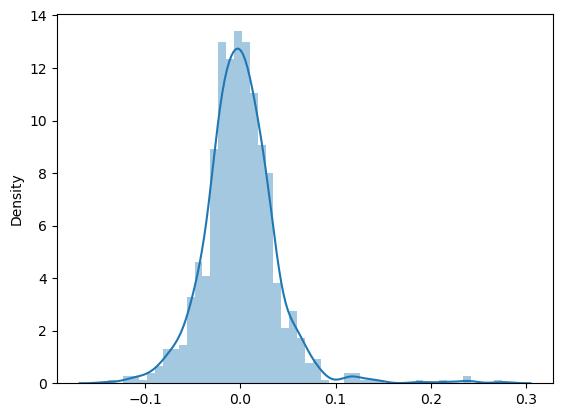

In [281]:
res = Y_train - y_train_pred
sns.distplot(res)

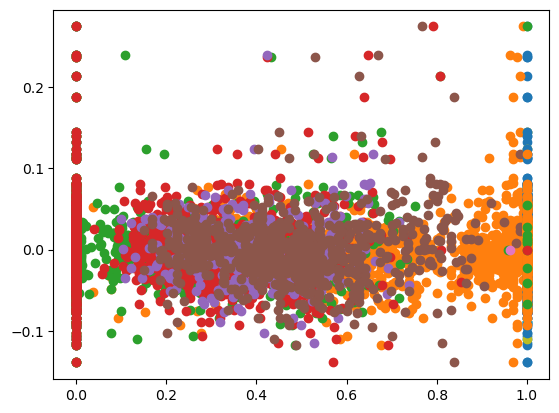

In [282]:
res_df = pd.DataFrame(res)

for col in X_train_rfe:
    plt.scatter(X_train_rfe[col], res_df )
    plt.show

#### We can see from above that the residuals are normally distributed but there seems to be some underlying pattern among them violating the homescadasticity rule. We can try with regularization and see if it helps

### Prepping the test data for prediction

In [283]:
df_test.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1.5STORY-UNFIN,MSSubClass_1STORY-1945-AND-OLDER,MSSubClass_1STORY-1946-AND-NEW,MSSubClass_1STORY-PUD-1946-AND-NEW,MSSubClass_2-STORY-1946-AND-NEW,MSSubClass_2.5STORY,MSSubClass_2FAM-CONV,MSSubClass_2STORY-1945-AND-OLDER,MSSubClass_2STORY-PUD-1946-AND-NEW,MSSubClass_DUPLX,MSSubClass_ONESTORY-WFIN-ATTIC,MSSubClass_PUD-MULTILEVEL,MSSubClass_SPLIT-FOYER,MSSubClass_SPLIT-OR-MULTI,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Average,OverallCond_BelowAverage,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_VeryGood,OverallCond_VeryPoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa

In [284]:
num_vars = df_test.select_dtypes(include=['float64', 'int64', 'int32']).columns
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1.5STORY-UNFIN,MSSubClass_1STORY-1945-AND-OLDER,MSSubClass_1STORY-1946-AND-NEW,MSSubClass_1STORY-PUD-1946-AND-NEW,MSSubClass_2-STORY-1946-AND-NEW,MSSubClass_2.5STORY,MSSubClass_2FAM-CONV,MSSubClass_2STORY-1945-AND-OLDER,MSSubClass_2STORY-PUD-1946-AND-NEW,MSSubClass_DUPLX,MSSubClass_ONESTORY-WFIN-ATTIC,MSSubClass_PUD-MULTILEVEL,MSSubClass_SPLIT-FOYER,MSSubClass_SPLIT-OR-MULTI,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Average,OverallCond_BelowAverage,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_VeryGood,OverallCond_VeryPoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa

In [285]:
Y_test = df_test.pop("SalePrice")
X_test = df_test

In [286]:
X_test = sm.add_constant(X_test, has_constant='add')
X_test.head()

,const,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_1.5STORY-UNFIN,MSSubClass_1STORY-1945-AND-OLDER,MSSubClass_1STORY-1946-AND-NEW,MSSubClass_1STORY-PUD-1946-AND-NEW,MSSubClass_2-STORY-1946-AND-NEW,MSSubClass_2.5STORY,MSSubClass_2FAM-CONV,MSSubClass_2STORY-1945-AND-OLDER,MSSubClass_2STORY-PUD-1946-AND-NEW,MSSubClass_DUPLX,MSSubClass_ONESTORY-WFIN-ATTIC,MSSubClass_PUD-MULTILEVEL,MSSubClass_SPLIT-FOYER,MSSubClass_SPLIT-OR-MULTI,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Average,OverallCond_BelowAverage,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_VeryGood,OverallCond_VeryPoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,Poo

In [287]:
X_test = X_test[X_train_rfe.columns]
X_test.head()

,const,YearBuilt,BsmtFinSF1,1stFlrSF,2ndFlrSF,GarageArea,PoolArea,MSSubClass_DUPLX,Neighborhood_Crawfor,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Mod,PoolQC_Gd
186,1.0,0.846154,0.279250,0.344384,0.000000,0.464920,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
573,1.0,0.923077,0.000000,0.171607,0.317676,0.374181,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1424,1.0,0.600000,0.208867,0.393916,0.000000,0.452760,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
777,1.0,0.723077,0.348263,0.218409,0.000000,0.411600,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12,1.0,0.630769,0.336837,0.225429,0.000000,0.329280,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [288]:
y_train = Y_train
y_test = Y_test
y_pred_train = lr_model.predict(X_train_rfe)
y_pred_test = lr_model.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8688232176118929
0.7821293353692077
1.3622519998221638
1.0269174781206416
0.001482319912755347
0.002606389538377263


#### Let's try some regularization techniques see if we can improve upon previous model

In [289]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### RIDGE REGULARIZATION

In [290]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [291]:
print(model_cv.best_params_)

{'alpha': 1.0}


In [292]:
#Fitting Ridge model for alpha = 1.0 and printing coefficients which have been penalised
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, Y_train)
print(ridge.coef_)

[ 0.          0.11604411  0.0815456   0.29360723  0.18622532  0.06842061
  0.12316953 -0.04706461  0.0488778  -0.10603655 -0.09473014 -0.11659564
 -0.05354821 -0.04258582]


In [293]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_train = Y_train
y_test = Y_test
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8651963116554826
0.815009294305478
1.3999168960205535
0.8719401911657242
0.0015233045658547917
0.002213046170471381


### LASSO REGULARIZATON

In [294]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [295]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [296]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001)

In [297]:
lasso.coef_

array([ 0.        ,  0.11643006,  0.07883301,  0.31711602,  0.19367411,
        0.06108072,  0.11151866, -0.04798856,  0.04569834, -0.10387248,
       -0.09321829, -0.11412798, -0.05304461, -0.        ])

In [298]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_train = Y_train
y_test = Y_test
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8652447325471079
0.8185657505489696
1.399414052032091
0.8551770942026616
0.0015227574015583144
0.0021705002390930497


#### We will now compare all three models to see which has best performance

In [299]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.868823,0.865196,0.865245
1,R2 Score (Test),0.782129,0.815009,0.818566
2,RSS (Train),1.362252,1.399917,1.399414
3,RSS (Test),1.026917,0.871940,0.855177
4,MSE (Train),0.038501,0.039030,0.039023
5,MSE (Test),0.051053,0.047043,0.046589


### Linear Regression has a big difference in Train and Test performance. Lasso and Ridge are close but Lasso is marginally better, so we will go ahead with the Lasso model.

In [307]:
index = 0
for feature in lasso.feature_names_in_:
    print(feature,lasso.coef_[index])
    index += 1

const 0.0
YearBuilt 0.11643006255579033
BsmtFinSF1 0.07883301370857233
1stFlrSF 0.3171160230501925
2ndFlrSF 0.19367411301189713
GarageArea 0.061080722369312584
PoolArea 0.11151866387603585
MSSubClass_DUPLX -0.047988562562928744
Neighborhood_Crawfor 0.045698344939165345
KitchenQual_Fa -0.10387247606137072
KitchenQual_Gd -0.09321829319248413
KitchenQual_TA -0.11412797909422087
Functional_Mod -0.05304461485925843
PoolQC_Gd -0.0


### Doubling the alpha and checking the affects on ridge and Lasso

In [308]:
#Fitting Ridge model for alpha = 2.0 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, Y_train)
print(ridge.coef_)

[ 0.          0.11448168  0.08386744  0.27168191  0.17857789  0.07466159
  0.08907721 -0.04417935  0.04847951 -0.10197963 -0.09228923 -0.11583049
 -0.04704669 -0.01702856]


In [309]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_train = Y_train
y_test = Y_test
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8616378766279895
0.8163486415172034
1.4368707314797706
0.8656272758252224
0.001563515485832177
0.00219702354270361


In [310]:
alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0002)

In [311]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_train = Y_train
y_test = Y_test
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8631862405559555
0.8232893259862081
1.42079119500293
0.8329128660931009
0.0015460187105581392
0.002113992045921576


In [312]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.868823,0.861638,0.863186
1,R2 Score (Test),0.782129,0.816349,0.823289
2,RSS (Train),1.362252,1.436871,1.420791
3,RSS (Test),1.026917,0.865627,0.832913
4,MSE (Train),0.038501,0.039541,0.039319
5,MSE (Test),0.051053,0.046872,0.045978


In [313]:
index = 0
for feature in lasso.feature_names_in_:
    print(feature,lasso.coef_[index])
    index += 1

const 0.0
YearBuilt 0.1154357334248914
BsmtFinSF1 0.0792662312960738
1stFlrSF 0.31323733578954754
2ndFlrSF 0.1918528207652361
GarageArea 0.06171520703365474
PoolArea 0.06695505151577316
MSSubClass_DUPLX -0.04552994014945036
Neighborhood_Crawfor 0.04253215294833564
KitchenQual_Fa -0.09779085176501812
KitchenQual_Gd -0.08951124188284255
KitchenQual_TA -0.1112203244943943
Functional_Mod -0.0440407542988804
PoolQC_Gd -0.0


In [317]:
!pip freeze

argcomplete==3.1.1
certifi==2024.2.2
charset-normalizer==3.3.2
click==8.1.7
colorama==0.4.6
idna==3.7
jsonpickle==3.0.2
packaging==23.1
pipx==1.2.0
requests==2.31.0
tqdm==4.66.4
urllib3==2.2.1
userpath==1.9.0
